# **Projet python pour la data science / 2024-2025**

R√©dig√© par:
* ABE Kevin
* DEMGNE Lisa
* Oscar

## **Introduction**

Un accident de la route ou accident de la circulation est entendu comme une collision non voulue, non pr√©vue et mal anticip√©e d'au moins un engin roulant avec une chose, un animal ou une personne sur une voie publique ou priv√©e ouverte √† la circulation.Ils constituent un v√©ritable fl√©au mondial, causant chaque ann√©e des milliers de morts et de bless√©s. Ces trag√©dies bouleversent des vies et ont un impact consid√©rable sur la soci√©t√©. En France, la lutte contre ce ph√©nom√®ne est prise en charge au niveau national par la d√©l√©gation √† la s√©curit√© routi√®re, qui se sert des √©clairages fourni par un document d'information √©dit√© annuellement par l'ONISR (Observatoire National Interminist√©riel de la S√©curit√© Routi√®re) faisant la synth√®se des principales donn√©es de l'accidentologie.

Nous nous int√©resserons dans le cadre de ce projet √† la description de l'accidentologie en France en 2023, ainsi qu'a la pr√©diction du niveau de gravit√© d'un accident. Ainsi, ce projet se donne de renseigner sur la fr√©quence des accidents, le profil des victimes, les caract√©ristiques des v√©hicules impliqu√©s, les conditions m√©t√©orologiques,... et ainsi que les facteurs succeptibles d'influencer le niveau de gravit√© d'un accident.

In [1]:
!pip install requests
!pip install os
!pip install matplotlib
!pip install pandas 
!pip install plotly
!pip install plotly
!pip install io
!pip install seaborn
!pip install ipywidgets
!pip install tabulate
!pip install ipywidgets 
!pip install tabulate 
!pip install scipy
!pip install numpy 
!pip install IPython

Defaulting to user installation because normal site-packages is not writeable
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 64.9/64.9 KB 1.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 144.8/144.8 KB 11.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 164.9/164.9 KB 23.2 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 70.4/70.4 KB 26.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 126.3/126.3 KB 16.5 MB/s eta 0:00:00
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the r

### *Packages

In [2]:
import requests
import os
import matplotlib.pyplot as plt
import pandas as pd
import plotly
import plotly.express as px
import io
import seaborn as sns
import ipywidgets as widgets
from tabulate import tabulate
from scipy.stats import chi2_contingency
import numpy as np
from IPython.display import display


### **I- Importation des bases de donn√©es et preprocessing**

### 1)-Importation des bases de donn√©es

Dans cette partie, nous allons importer les bases donn√©es qui seront utilis√©es dans ce projet.
- base des usagers ayant √©t√© impliqu√© dans un accident de circulation en 2023
- base qui donne la description des v√©hicules impliqu√©s dans les accidents de circulation en 2023
- base des lieux o√π se sont produit les accidents
- base contenant les caract√©ristiques des accidents.




In [3]:
# fonction de t√©l√©chargement des donn√©es sur les accidents corporels
def telecharge(url_data,filename, path):
    # V√©rifie si le dossier 'data' existe, sinon le cr√©e
    if not os.path.exists(path):
        os.makedirs(path)
    #t√©l√©charge les donn√©es avec l'url
    response = requests.get(url_data)
    if response.status_code == 200:
        file_path = os.path.join(path, filename)
        with open(file_path, 'wb') as file:
            file.write(response.content)
        print(f"Fichier {filename} t√©l√©charg√© avec succ√®s:{file_path}")
    else:
        print(f"Echec de t√©l√©chargement pour {filename}. Statut: {response.status_code}")

# API pour acc√©der √† l'url de t√©l√©chargement
url_root="https://www.data.gouv.fr/api/1/datasets/53698f4ca3a729239d2036df/resources/"
urls={
    "usagers-2023.csv":"68848e2a-28dd-4efc-9d5f-d512f7dbe66f",
    "vehicules-2023.csv":"146a42f5-19f0-4b3e-a887-5cd8fbef057b",
    "lieux-2023.csv":"8bef19bf-a5e4-46b3-b5f9-a145da4686bc",
    "caract-2023.csv":"104dbb32-704f-4e99-a71e-43563cb604f2"
}
path='data'

for filename, resource_id in urls.items():
    url=url_root+resource_id
    response1=requests.get(url)
    if response1.status_code==200:
        data=response1.json()
        url_data=data['url']
    else:
        print("downloading failed")
    telecharge(url_data,filename,path)


Fichier usagers-2023.csv t√©l√©charg√© avec succ√®s:data/usagers-2023.csv
Fichier vehicules-2023.csv t√©l√©charg√© avec succ√®s:data/vehicules-2023.csv
Fichier lieux-2023.csv t√©l√©charg√© avec succ√®s:data/lieux-2023.csv
Fichier caract-2023.csv t√©l√©charg√© avec succ√®s:data/caract-2023.csv


In [ ]:
# t√©l√©chargement de la liste des d√©partements
url_code_dep=f"https://tabular-api.data.gouv.fr/api/resources/e436f772-b05d-47f8-b246-265faab8679f/data/?page=1"
response=requests.get(url_code_dep)
data=response.json()
df_code_dep = pd.DataFrame(data["data"])
df_dep=df_code_dep
for i in range(2,7):
    url_code_dep=f"https://tabular-api.data.gouv.fr/api/resources/e436f772-b05d-47f8-b246-265faab8679f/data/?page={i}"
    response=requests.get(url_code_dep)
    if response.status_code==200:
        data=response.json()
        df_code_dep1 = pd.DataFrame(data["data"])
    else:
        print("downloading failed")
    df_dep=pd.concat([df_dep, df_code_dep1], axis=0)


In [52]:
# base des usagers 
df_usagers = pd.read_csv("data/usagers-2023.csv", sep = ';')
df_usagers.head()

Num_Acc    id_usager  id_vehicule num_veh  place  catu  grav  sexe  \
0  202300000001  203¬†851¬†184  155¬†680¬†557     A01      1     1     4     1   
1  202300000002  203¬†851¬†182  155¬†680¬†556     A01      1     1     1     2   
2  202300000002  203¬†851¬†183  155¬†680¬†556     A01     10     3     3     1   
3  202300000003  203¬†851¬†180  155¬†680¬†554     B01      1     1     3     1   
4  202300000003  203¬†851¬†181  155¬†680¬†555     A01      1     1     1     2   

   an_nais  trajet  secu1  secu2  secu3  locp actp  etatp  
0   1978.0       5      2      0     -1    -1   -1     -1  
1   1997.0       9      1      0     -1    -1   -1     -1  
2   1997.0       9      0     -1     -1     2    3      1  
3   1987.0       0      2      6      0     0    0     -1  
4   1984.0       0      1      0      0     0    0     -1

In [4]:
# Base des v√©hicules 
df_vehicules = pd.read_csv("data/vehicules-2023.csv", sep = ';')
df_vehicules.head()

Num_Acc  id_vehicule num_veh  senc  catv  obs  obsm  choc  manv  \
0  202300000001  155¬†680¬†557     A01     1    30    0     0     5     1   
1  202300000002  155¬†680¬†556     A01     2     7    0     1     1     1   
2  202300000003  155¬†680¬†554     B01     1     2    0     2     1    16   
3  202300000003  155¬†680¬†555     A01     2     7    0     2     2    15   
4  202300000004  155¬†680¬†551     B01     1     7    0     2     9     2   

   motor  occutc  
0      1     NaN  
1      1     NaN  
2      1     NaN  
3      1     NaN  
4      4     NaN

In [11]:
# Base des lieux 
df_lieux = pd.read_csv("data/lieux-2023.csv", sep = ';')
df_lieux.head(5)

/tmp/ipykernel_174496/483356611.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_lieux = pd.read_csv("data/lieux-2023.csv", sep = ';')


Num_Acc  catr                 voie  v1   v2  circ nbv  vosp  prof  \
0  202300000001     4        RUE DE RIVOLI   0  NaN     1   2     0     1   
1  202300000001     4  RUE SAINT FLORENTIN   0  NaN     1   1     0     1   
2  202300000002     3                  120   0  NaN     2   3     2     1   
3  202300000003     3                    5   0  NaN     2   4     0     1   
4  202300000003     3                   87   0  NaN     2   4     0     1   

    pr  pr1  plan lartpc larrout  surf  infra  situ  vma  
0   -1   -1     1    NaN      -1     2      0     1   30  
1   -1   -1     1    NaN      -1     2      0     1   30  
2   -1   -1     1    NaN      -1     2      0     1   50  
3    1    0     1    NaN      -1     2      5     1   50  
4    1    0     1    NaN      -1     2      5     1   50

In [12]:
# Base caract
df_caract = pd.read_csv("data/caract-2023.csv", sep = ';')
df_caract.head()

Num_Acc  jour  mois    an   hrmn  lum dep    com  agg  int  atm  col  \
0  202300000001     7     5  2023  06:00    1  75  75101    2    4    2    7   
1  202300000002     7     5  2023  05:30    5  94  94080    2    1    3    6   
2  202300000003     7     5  2023  20:50    1  94  94022    2    3    2    1   
3  202300000004     6     5  2023  23:57    5  94  94078    2    1    3    5   
4  202300000005     7     5  2023  00:50    5  94  94068    2    2    3    3   

                         adr          lat        long  
0              RUE DE RIVOLI  48,86638600  2,32347100  
1            Avenue de Paris  48,84547782  2,42868146  
2  Avenue du G√©n√©ral Leclerc  48,76240000  2,40655000  
3               Rue de Paris  48,73248432  2,44687575  
4       56bis Avenue Raspail  48,78581000  2,49217000

Nous construisons et nettoyons √† pr√©sent la base de donn√©es qui r√©sultera de la fusion des toutes les bases import√©es pr√©cedemment. Cette base de donn√©es sera utilis√©e pour la mod√©lisation.

Dans un premier temps, nous fusionons la base des usagers et celle des v√©hicules sur les variables "Num_acc" (Num√©ro de l'accident), "id_vehicule" (identifiant du v√©hicule) et "num_veh" (num√©ro du v√©hicule) qui sont commun aux deux bases. Ensuite, nous fusionons les autres bases sur la variable "Num_acc". Nous utilisons l'option "inner" qui utilise l'intersection des cl√©s dans les deux tables.

In [20]:
# fusion des bases de donn√©es
df_merge = df_usagers.merge(df_vehicules, on=["Num_Acc","id_vehicule","num_veh"], how="inner") 
df_merge = df_merge.merge(df_lieux, on="Num_Acc", how="inner")
df_merge = df_merge.merge(df_caract, on="Num_Acc", how="inner")

### 2)- Preprocessing

Nous allons par la suite visualiser le pourcentage de valeurs manquantes de la base:

In [21]:
df_merge.isna().sum()[df_merge.isna().sum()!=0]/len(df_merge)*100

an_nais     2.145611
occutc     98.334586
voie       17.348167
v2         91.677205
lartpc     99.952347
adr         2.474906
dtype: float64

Nous supprimons les variables qui ont plus de 90% de valeurs manquantes car elles n'apportent pas vraiment d'informations.

In [ ]:
df_merge.drop(["occutc","lartpc","v2"], axis=1, inplace=True)
df_lieux.drop(["lartpc","v2"], axis=1, inplace=True)
df_vehicules.drop(["occutc"], axis=1, inplace=True)

Nous commen√ßons par supprimer les variables d'identification.

In [ ]:
var=["Num_Acc","jour","an","com","adr","lat","long","voie","v1","v2","id_vehicule","num_veh","id_usager", "dep"]
Num_acc=df_merge["Num_Acc"]
df_merge.drop(var, axis=1,inplace=True)
# supprimer aussi dans les autres bases????

Ensuite, nous d√©duisons de la variable "an_nais" (ann√©e de naissance), l'√¢ge des individus. 

In [ ]:
df_merge["Age"] = 2023-df_merge["an_nais"]
sns.boxplot(data=df_merge, x=df_merge['Age'])

Nous allons imputer les valeurs manquantes de l'√¢ge par la m√©diane car elle est moins sensible aux valeurs abb√©rantes.

In [ ]:
df_merge["Age"]=df_merge["Age"].fillna(df_merge["Age"].median())
df_usagers["Age"] = 2023-df_usagers["an_nais"]
df_usagers["Age"]=df_usagers["Age"].fillna(df_usagers["Age"].median())

In [ ]:
#recodage des variables trajet et actp de la base usager
df_merge["trajet"]=df_merge["trajet"].replace(0, value=-1)
df_merge["actp"]=df_merge["actp"].replace(0, value=-1)

# variables de type object de la base
df_merge.select_dtypes("object").columns

In [ ]:
# conversion des variables de type object en variables num√©riques
def replace_pr(val):
    if len(val.split())==1:
        val=val
    else:
        if len(val.split())>1:
            val=val.split()[1]
        else:
            val="-1"
    return val
df_merge["pr"]=df_merge["pr"].apply(func=replace_pr)
df_merge["pr"]=df_merge["pr"].astype(float)
df_merge["pr1"]=df_merge["pr1"].apply(func=replace_pr)
df_merge["pr1"]=df_merge["pr1"].astype(float)
def rep_virgule(val):
    val=val.replace(",",".")
    return val
df_merge["larrout"]=df_merge["larrout"].apply(rep_virgule)
df_merge["larrout"]=df_merge["larrout"].astype(float)
def heure(val):
    val=val.split(":")[0]
    return val
df_merge["hrmn"]=df_merge["hrmn"].apply(func=heure)
df_merge["hrmn"]=df_merge["hrmn"].astype(float)

df_merge["nbv"]=df_merge["nbv"].str.strip()
df_merge["nbv"]=df_merge["nbv"].replace("#VALEURMULTI","-1")
df_merge["nbv"]=df_merge["nbv"].astype(float)

df_merge["actp"]=df_merge["actp"].replace(["A","B"],["10","11"])
df_merge["actp"]=df_merge["actp"].astype(float)

## **II- Analyses descriptives**

Dans cette partie, nous ferrons essentiellement de l'analyse descriptive univari√©e et bivari√©e. De mani√®re plus pr√©cise, il s'agira de visualiser la distribution des variables des diff√©rentes bases individuellement ou en croisant avec d'autres variables.

### 1- Description de la base usagers

Selon le "Guide BAAC 2017" un usager est une personne physique impliqu√©e dans un accident de la circulation en tant que conducteur/passager d'un v√©hicule ou pi√©ton.

In [ ]:
#Appliquer d'abord les mapping ensuite mettre tous les titres dans la fonction. Afficher toutes les variables avant d'√©tudier en profondeur pour chaque cas. 


def plot_all_distributions1(df, columns):
    """
    Repr√©sente les distributions des variables cat√©gorielles dans un seul cadran avec des sous-graphiques.
    
    Param√®tres:
    df : DataFrame pandas contenant les donn√©es
    columns : Liste des colonnes cat√©gorielles √† repr√©senter
    """
    # Dictionnaire pour mapper les variables aux titres
    column_titles = {
        "senc": "Sens de circulation",
        "obs": "Obstacles fixes heurt√©s",
        "obsm": "Obstacle mobile heurt√©",
        "choc": "Point de choc initial",
        "manv": "Man≈ìuvre principale avant accident",
        "motor": "Type de motorisation du v√©hicule"
    }
    
    # D√©finir le nombre de lignes et de colonnes pour les subplots
    n_cols = 2  # Nombre de colonnes par ligne pour agrandir les graphiques
    n_rows = (len(columns) + n_cols - 1) // n_cols  # Nombre total de lignes (arrondi vers le haut)
    
    # Initialiser la figure avec une taille plus grande
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows))
    axes = axes.flatten()  # Aplatir le tableau des axes pour un acc√®s facile
    
    # Parcourir les colonnes pour cr√©er chaque graphique
    for i, column in enumerate(columns):
        sns.countplot(data=df, x=column, palette='viridis', ax=axes[i])
        title = column_titles.get(column, column)  # R√©cup√©rer le titre ou le nom de la colonne par d√©faut
        axes[i].set_title(f"Distribution de '{title}'", fontsize=14)
        axes[i].set_xlabel(title, fontsize=12)
        axes[i].set_ylabel("Fr√©quence", fontsize=12)
        axes[i].tick_params(axis='x', rotation=45)
        
        # Ajouter les valeurs au-dessus des barres
        for p in axes[i].patches:
            axes[i].annotate(f'{int(p.get_height())}',
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center',
                             fontsize=10, color='black',
                             xytext=(0, 5), textcoords='offset points')
        
    # Supprimer les axes vides si le nombre de graphiques est inf√©rieur aux subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()

R√©partition par sexe : Proportion d'hommes et de femmes impliqu√©s dans les accidents.
Selon "Guide BAAC 2017" 1 = Masculin, 2 = Feminin

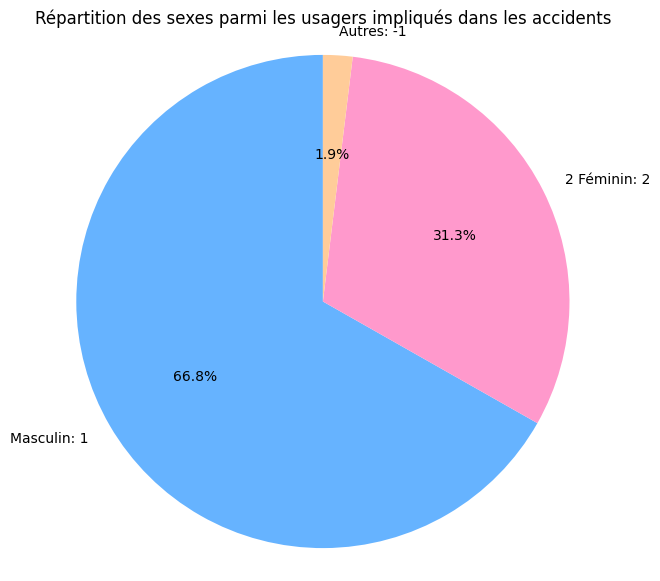

In [53]:
df_usagers['sexe_label'] = df_usagers['sexe'].replace({
    1: 'Masculin: 1', 
    2: '2 F√©minin: 2', 
    -1: 'Autres: -1'
})

# Compter la r√©partition des sexes apr√®s remplacement
sexe_counts = df_usagers['sexe_label'].value_counts()

colors = ['#66b3ff', '#ff99cc', '#ffcc99']  # Masculin, F√©minin, Autres

# Tracer un diagramme circulaire
plt.figure(figsize=(7, 7))
plt.pie(sexe_counts, labels=sexe_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("R√©partition des sexes parmi les usagers impliqu√©s dans les accidents")
plt.axis('equal') 
plt.show()
#La majorit√© des usagers impliqu√©s dans les accidents sont de sexe masculin, repr√©sentant 66,8% du total. 
# Cela sugg√®re que, dans cette population, les hommes sont nettement plus nombreux que les femmes √† √™tre impliqu√©s dans des accidents.
# Les femmes repr√©sentent 31,3% des usagers impliqu√©s et la cat√©gorie "autres" repr√©sente 1,9% des cas, ce qui pourrait inclure des 
# personnes dont le sexe n'est pas pr√©cis√© ou qui ne s'identifient pas selon les cat√©gories traditionnelles de sexe. 
# Cette proportion est relativement faible, mais elle m√©rite d'√™tre mentionn√©e.

Repartition selon l'√¢ge

‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ Statistique   ‚îÇ    Valeur ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Nombre        ‚îÇ 123191    ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Moyenne       ‚îÇ     38.75 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ √âcart-type    ‚îÇ     19.1  ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Min           ‚îÇ      0    ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ 25%           ‚îÇ     23    ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ 50% (m√©diane) ‚îÇ     35    ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ 75%           ‚îÇ     52    ‚îÇ
‚îú‚îÄ

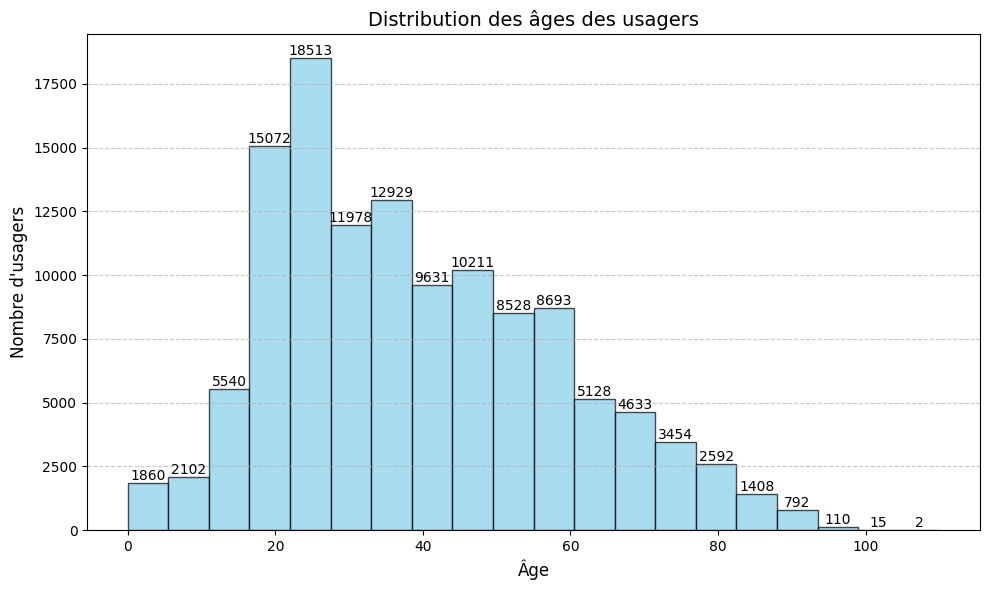

In [6]:
df_usagers['age'] = 2023 - df_usagers['an_nais']
# Calcul des statistiques descriptives
age_stats = df_usagers['age'].describe()

age_summary = pd.DataFrame({
    'Statistique': ['Nombre', 'Moyenne', '√âcart-type', 'Min', '25%', '50% (m√©diane)', '75%', 'Max'],
    'Valeur': [
        int(age_stats['count']),
        round(age_stats['mean'], 2),
        round(age_stats['std'], 2),
        int(age_stats['min']),
        int(age_stats['25%']),
        int(age_stats['50%']),
        int(age_stats['75%']),
        int(age_stats['max']),
    ]
})
print(tabulate(age_summary, headers='keys', tablefmt='fancy_grid', showindex=False))

# Groupement des √¢ges par tranche de 10 ans
age_bins = pd.cut(df_usagers['age'], bins=range(0, 121, 10), right=False)
age_distribution = age_bins.value_counts().sort_index()

distribution_summary = pd.DataFrame({
    'Tranche d\'√¢ge': [f"[{int(interval.left)}-{int(interval.right - 1)}]" for interval in age_distribution.index],
    'Nombre d\'usagers': age_distribution.values,
    'Proportion (%)': (age_distribution.values / len(df_usagers) * 100).round(2)
})

print(tabulate(distribution_summary, headers='keys', tablefmt='fancy_grid', showindex=False))

# Histogramme
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df_usagers['age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Ajouter les chiffres au-dessus de chaque barre
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2,  # Position X au centre de la barre
             patches[i].get_height(),  # Position Y √† la hauteur de la barre
             f'{int(n[i])}',  # Afficher le nombre d'usagers
             ha='center', va='bottom', fontsize=10, color='black')

plt.title('Distribution des √¢ges des usagers', fontsize=14)
plt.xlabel('√Çge', fontsize=12)
plt.ylabel('Nombre d\'usagers', fontsize=12)

# Grille et ajustement
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


#La population analys√©e, compos√©e de 123 191 usagers, pr√©sente un √¢ge moyen de 38,75 ans, avec une dispersion mod√©r√©e (√©cart-type de 19,1 ans) 
# et une m√©diane de 35 ans, indiquant que la moiti√© des individus a cet √¢ge ou moins. La majorit√© des usagers se situe entre 23 ans (1er quartile) 
# et 52 ans (3e quartile), avec des √¢ges extr√™mes allant de 0 √† 110 ans, bien que ces valeurs puissent inclure des erreurs ou des cas particuliers.
#  La distribution par tranche d'√¢ge r√©v√®le une forte proportion de jeunes (11,2 % entre 10 et 19 ans) et une concentration probable dans les tranches d'√¢ge actif (20-49 ans),
#  tandis que les individus tr√®s √¢g√©s (100 ans et plus) restent marginaux (0,01 %). Cette structure refl√®te une population principalement jeune et adulte.

Cat√©gorie d'usagers (catu) : Identification des cat√©gories les plus expos√©es (conducteurs, passagers, pi√©tons).

In [7]:
catu_counts = df_usagers['catu'].value_counts()
catu_proportions = df_usagers['catu'].value_counts(normalize=True)

catu_labels = {1: 'Conducteur', 2: 'Passager', 3: 'Pi√©ton'}
catu_counts = catu_counts.rename(index=catu_labels)
catu_proportions = catu_proportions.rename(index=catu_labels)

catu_summary = pd.DataFrame({'Fr√©quence': catu_counts,'Proportion': catu_proportions})
catu_summary['Proportion (%)'] = catu_summary['Proportion'] * 100
catu_summary = catu_summary.rename(columns={'Fr√©quence': 'Nombre d\'observations'})

# Visualisation
total_count = catu_counts.sum()
catu_percentage = (catu_counts / total_count) * 100  

plt.figure(figsize=(10, 7))
sns.barplot(x=catu_counts.index,y=catu_percentage.values,palette="viridis")

plt.title("Distribution des cat√©gories d'usagers", fontsize=18, weight='bold', color='navy')
plt.xlabel("R√¥le des usagers", fontsize=14, weight='bold')
plt.ylabel("Pourcentage d'usagers", fontsize=14, weight='bold')
plt.xticks(rotation=30, fontsize=12)
# Ajouter les valeurs en pourcentages au-dessus des barres
for i, value in enumerate(catu_percentage.values):
    plt.text(i, value + 0.5, f"{value:.2f}%", ha='center', fontsize=12, color='black', weight='bold')
# Ajustement des marges pour √©viter le chevauchement
plt.tight_layout()

plt.show()


# On observe que la majorit√© des personnes impliqu√©es dans des accidents sont des conducteurs(soit 74,3% des usagers), 
# ensuite vient les passagers (18,1%) et enfin les pi√©tons (7.6%). 

/tmp/ipykernel_44272/1411351247.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=catu_counts.index,y=catu_percentage.values,palette="viridis")


R√©partition selon la gravit√© (grav) : Observation de la distribution des niveaux de gravit√© des accidents.

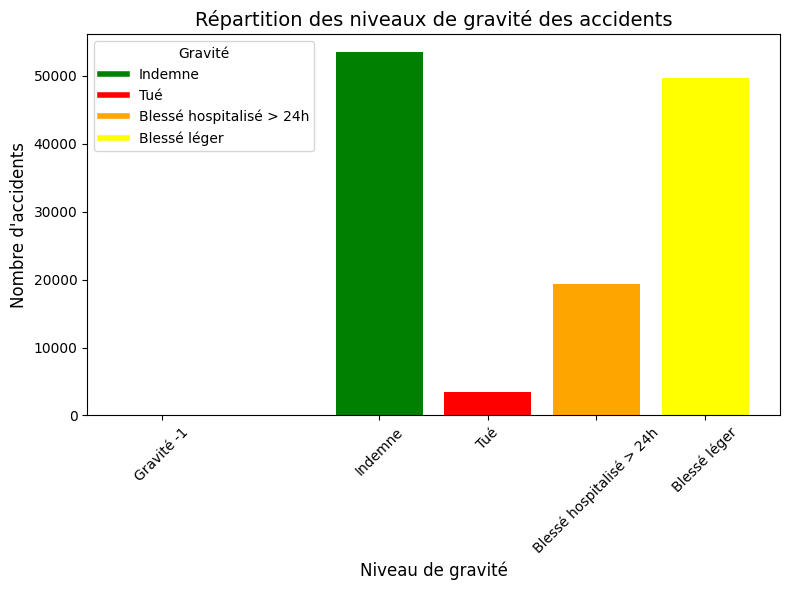

In [ ]:
# Statistiques descriptives 
grav_stats = df_usagers['grav'].value_counts()
grav_percentage = df_usagers['grav'].value_counts(normalize=True)

grav_labels = {1: 'Indemne', 2: 'Tu√©', 3: 'Bless√© hospitalis√© > 24h', 4: 'Bless√© l√©ger'}

colors = {
    1: 'green',        # Indemne
    2: 'red',          # Tu√©
    3: 'orange',       # Bless√© hospitalis√© > 24h
    4: 'yellow'        # Bless√© l√©ger
}

# G√©n√©ration des couleurs pour les barres
bar_colors = [colors.get(i, 'gray') for i in grav_stats.index]

# Cr√©ation du graphique
plt.figure(figsize=(8, 6))
plt.bar(grav_stats.index, grav_stats.values, color=bar_colors)

# Ajout des titres et des √©tiquettes
plt.title('R√©partition des niveaux de gravit√© des accidents', fontsize=14)
plt.xlabel('Niveau de gravit√©', fontsize=12)
plt.ylabel('Nombre d\'accidents', fontsize=12)
plt.xticks(grav_stats.index, [grav_labels.get(i, f"Gravit√© {i}") for i in grav_stats.index], rotation=45)

# Ajout d'une l√©gende
custom_legend = [plt.Line2D([0], [0], color=color, lw=4) for color in colors.values()]
plt.legend(custom_legend, [grav_labels[i] for i in colors.keys()], title="Gravit√©", fontsize=10)

plt.tight_layout()
plt.show()

#Les r√©sultats montrent que la majorit√© des usagers impliqu√©s dans les accidents (50919) sont indemnes, ce qui indique que 
# les accidents sont souvent de faible gravit√©. Aussi, un nombre importante (49603) ont entrain√© des blessures l√©g√®res. 
# Il en ressort √©galement un r√©sultats alarmant selon lequel 19271 des cas d'accidents ont entrain√© des blessures graves et n√©cessitent
# une hospitalisation de plus de 24 heures et 3398 accidents ont entrain√© la mort des usagers.  

Analyse de la gravit√© en fonction du sexe ou de la cat√©gorie d'usager.

<Figure size 1000x600 with 0 Axes>

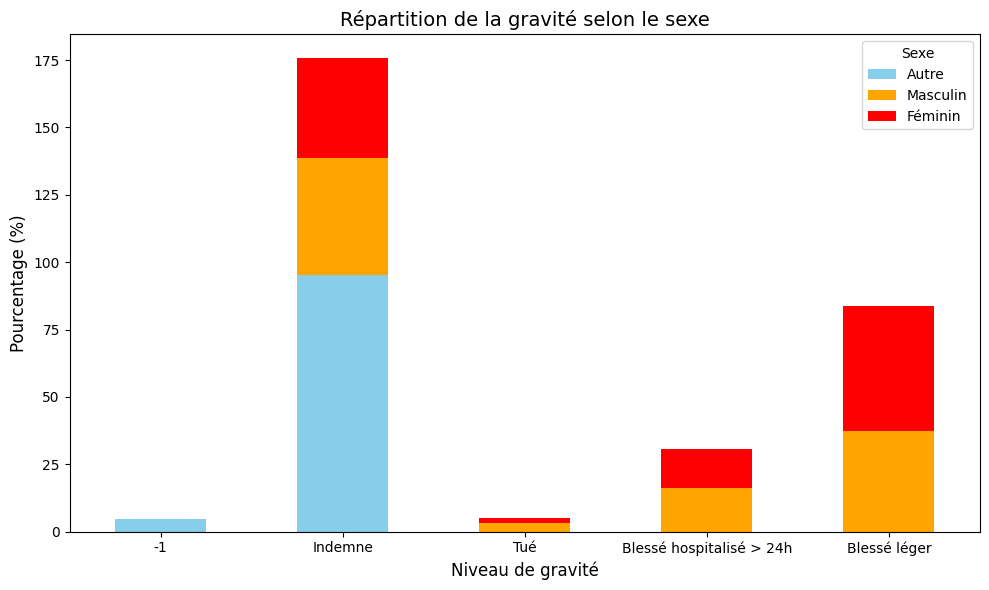

<Figure size 1200x800 with 0 Axes>

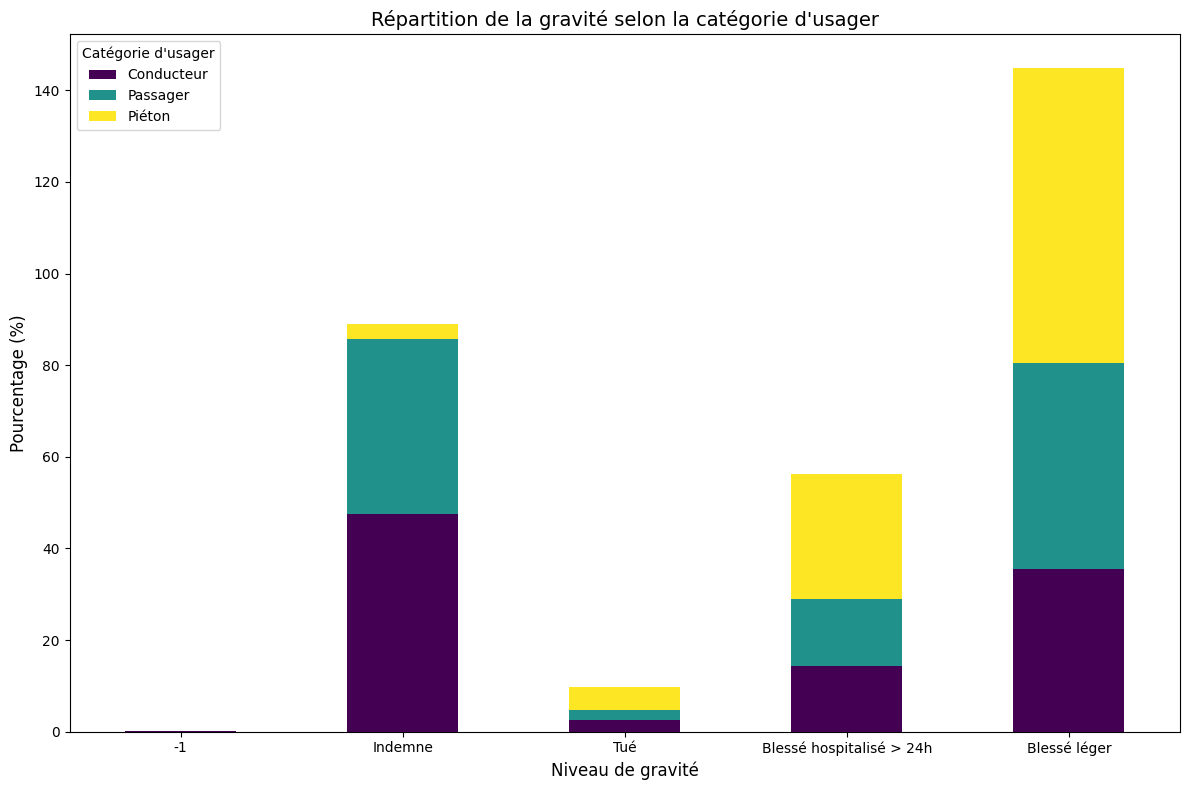

In [5]:
# Dictionnaires pour les libell√©s
sexe_labels = {1: 'Masculin', 2: 'F√©minin', -1: 'Autre'}
catu_labels = {1: 'Conducteur', 2: 'Passager', 3: 'Pi√©ton'}
grav_labels = {1: 'Indemne', 2: 'Tu√©', 3: 'Bless√© hospitalis√© > 24h', 4: 'Bless√© l√©ger'}

# 1. R√©partition de la gravit√© selon le sexe (en pourcentage)
grav_sexe = pd.crosstab(df_usagers['grav'], df_usagers['sexe'], normalize='columns') * 100
grav_sexe = grav_sexe.rename(index=grav_labels, columns=sexe_labels)

# Visualisation de la gravit√© en fonction du sexe
plt.figure(figsize=(10, 6))
grav_sexe.index = [grav_labels.get(i, str(i)) for i in grav_sexe.index]  # Remplacer les indices par les libell√©s
grav_sexe.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange', 'red', 'green'])
plt.title('R√©partition de la gravit√© selon le sexe', fontsize=14)
plt.xlabel('Niveau de gravit√©', fontsize=12)
plt.ylabel('Pourcentage (%)', fontsize=12)
plt.legend(title='Sexe', labels=[sexe_labels.get(x, str(x)) for x in grav_sexe.columns])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. R√©partition de la gravit√© selon la cat√©gorie d‚Äôusager (en pourcentage)
grav_usager = pd.crosstab(df_usagers['grav'], df_usagers['catu'], normalize='columns') * 100
grav_usager = grav_usager.rename(index=grav_labels, columns=catu_labels)

# Visualisation de la gravit√© en fonction de la cat√©gorie d‚Äôusager
plt.figure(figsize=(12, 8))
grav_usager.index = [grav_labels.get(i, str(i)) for i in grav_usager.index]  # Remplacer les indices par les libell√©s
grav_usager.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('R√©partition de la gravit√© selon la cat√©gorie d\'usager', fontsize=14)
plt.xlabel('Niveau de gravit√©', fontsize=12)
plt.ylabel('Pourcentage (%)', fontsize=12)
plt.legend(title='Cat√©gorie d\'usager', labels=[catu_labels.get(x, str(x)) for x in grav_usager.columns])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
 
#La r√©partition de la gravit√© selon le sexe met en √©vidence une surrepr√©sentation des hommes par rapport aux femmes dans la plupart des cat√©gories de gravit√©.
#  Cependant La cat√©gorie de sexe "Autre" repr√©sente la majorit√© des personnes indemnes.
#  Les femmes, bien qu‚Äôimpliqu√©es dans les accidents, pr√©sentent des proportions plus faibles dans la plupart des cat√©gories de gravit√© sauf les bl√©ss√©s l√©gers. 
# Cette diff√©rence dans la r√©partition pourrait √™tre li√©e √† des variations dans les types d'usagers ou les comportements sur la route selon le sexe.

#Le tableau pr√©sente la r√©partition des accidents par gravit√© selon la cat√©gorie d'usager (conducteur, passager, pi√©ton). 
# Il montre que les conducteurs et passagers sont principalement indemnes ou l√©g√®rement bless√©s, avec respectivement 47,48 % 
# et 38,27 % des conducteurs indemnes. En revanche, les pi√©tons sont plus gravement touch√©s, avec 64,57 % d'entre eux bless√©s 
# l√©g√®rement et un taux √©lev√© de bless√©s hospitalis√©s (27,27 %). Les conducteurs et passagers ont un pourcentage relativement 
# faible de d√©c√®s (2,61 % et 2,12 %, respectivement), tandis que les pi√©tons repr√©sentent 4,98 %. Cette r√©partition souligne 
# la vuln√©rabilit√© des pi√©tons dans les accidents, √©tant plus susceptibles d'√™tre gravement bless√©s ou tu√©s, tandis que les 
# conducteurs et passagers sont plus souvent indemnes ou l√©g√®rement bless√©s.

analyse des √©quipements de s√©curit√© (secu1, secu2)

In [6]:
secu1_labels = {
    1: 'Ceinture',
    2: 'Casque',
    3: 'Dispositif enfants',
    8: 'Non d√©terminable'
}

secu2_labels = {
    0: 'Aucun √©quipement',
    4: 'Gilet r√©fl√©chissant',
    5: 'Airbag personnel (2/3 RM)',
    6: 'Gants (2/3 RM)',
    7: 'Airbag personnel + Gants (2/3 RM)',
    9: 'Autres √©quipements'
}
secu3_labels = {
    -1: "Non renseign√©",
    0: "Aucun √©quipement",
    1: "Ceinture",
    2: "Casque",
    3: "Dispositif enfants",
    4: "Gilet r√©fl√©chissant",
    5: "Airbag (2RM/3RM)",
    6: "Gants (2RM/3RM)",
    7: "Gants + Airbag (2RM/3RM)",
    8: "Non d√©terminable",
    9: "Autre"
}
# Mapping des libell√©s sur le DataFrame
df_usagers['secu1_label'] = df_usagers['secu1'].map(secu1_labels)
df_usagers['secu2_label'] = df_usagers['secu2'].map(secu2_labels)
df_usagers['secu3_label'] = df_usagers['secu3'].map(secu2_labels)

# Cr√©ation d'un widget pour s√©lectionner la variable
dropdown = widgets.Dropdown(
    options=['secu1_label', 'secu2_label', 'secu3_label'],
    value='secu1_label',
    description='Variable:',
    disabled=False
)

# Fonction pour afficher le graphique
def plot_security_distribution(variable):
    plt.figure(figsize=(10, 6))
    
    # Calcul des valeurs et des pourcentages
    value_counts = df_usagers[variable].value_counts(normalize=True) * 100
    labels = value_counts.index
    values = value_counts.values
    
    # Cr√©ation du barplot
    sns.barplot(
        x=labels,
        y=values,
        palette='viridis'
    )
    
    # Ajout des pourcentages sur les barres
    for i, value in enumerate(values):
        plt.text(i, value + 1, f'{value:.2f}%', ha='center', fontsize=12, color='black', weight='bold')
    
    # Titre et labels
    plt.title(f'Distribution des √©quipements de s√©curit√© - {variable}', fontsize=16)
    plt.xlabel('Dispositif de s√©curit√©', fontsize=14)
    plt.ylabel('Pourcentage d\'utilisation (%)', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Affichage du graphique
    plt.show()


# Interactivit√© : afficher le graphique en fonction de la s√©lection
widgets.interactive(plot_security_distribution, variable=dropdown)

interactive(children=(Dropdown(description='Variable:', options=('secu1_label', 'secu2_label', 'secu3_label'),‚Ä¶


R√©partition des √©quipements de s√©curit√© (secu2) :
+---+-----------------------------------+--------------------+
|   |      √âquipement de s√©curit√©       |  Pourcentage (%)   |
+---+-----------------------------------+--------------------+
| 0 |         Aucun √©quipement          | 74.62384646248495  |
| 1 |          Gants (2/3 RM)           | 19.88096830279524  |
| 2 |        Gilet r√©fl√©chissant        | 2.5494850876019792 |
| 3 |     Airbag personnel (2/3 RM)     |  1.92924969907717  |
| 4 |        Autres √©quipements         | 0.7807275645312292 |
| 5 | Airbag personnel + Gants (2/3 RM) | 0.2357228835094289 |
+---+-----------------------------------+--------------------+


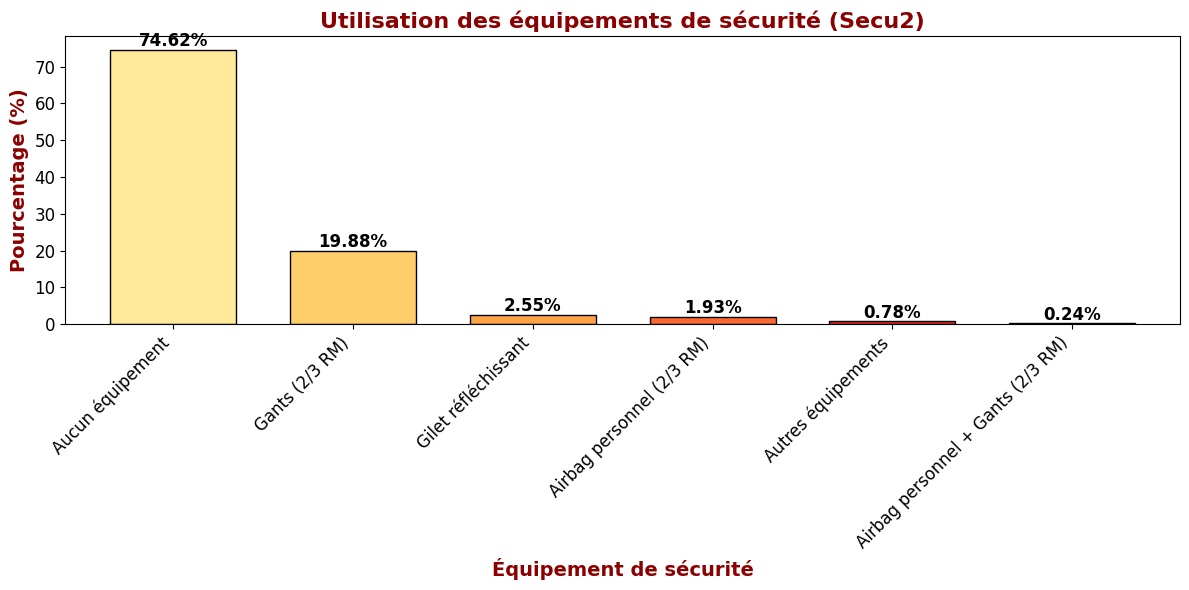


Impact des dispositifs de s√©curit√© (Secu1) sur les accidents graves (en %) :
+---+-------------------------+-------------------+
|   | dispositifs de s√©curit√© |  Pourcentage (%)  |
+---+-------------------------+-------------------+
| 0 |         Casque          | 65.38251862620389 |
| 1 |        Ceinture         | 89.3872965418973  |
| 2 |   Dispositif enfants    | 90.9090909090909  |
| 3 |    Non d√©terminable     | 83.3204134366925  |
+---+-------------------------+-------------------+


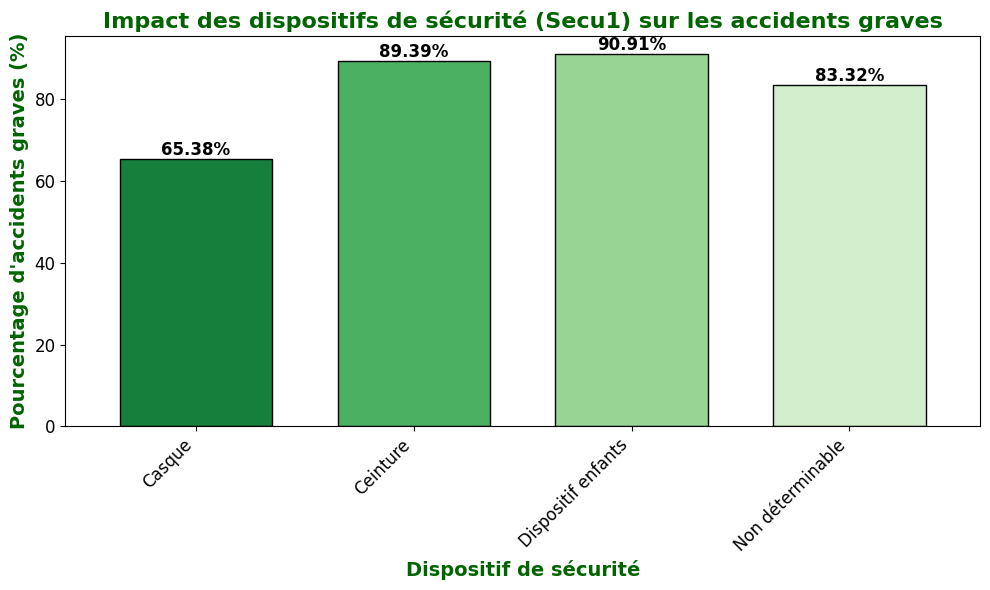


Impact des √©quipements de s√©curit√© (Secu2) sur les accidents graves (en %) :
+---+-----------------------------------+-------------------+
|   |      √âquipement de s√©curit√©       |  Pourcentage (%)  |
+---+-----------------------------------+-------------------+
| 0 |     Airbag personnel (2/3 RM)     | 82.06239168110918 |
| 1 | Airbag personnel + Gants (2/3 RM) | 73.04964539007092 |
| 2 |         Aucun √©quipement          | 93.3888926227121  |
| 3 |        Autres √©quipements         | 55.46038543897216 |
| 4 |          Gants (2/3 RM)           | 64.02623612512613 |
| 5 |        Gilet r√©fl√©chissant        | 95.01639344262294 |
+---+-----------------------------------+-------------------+


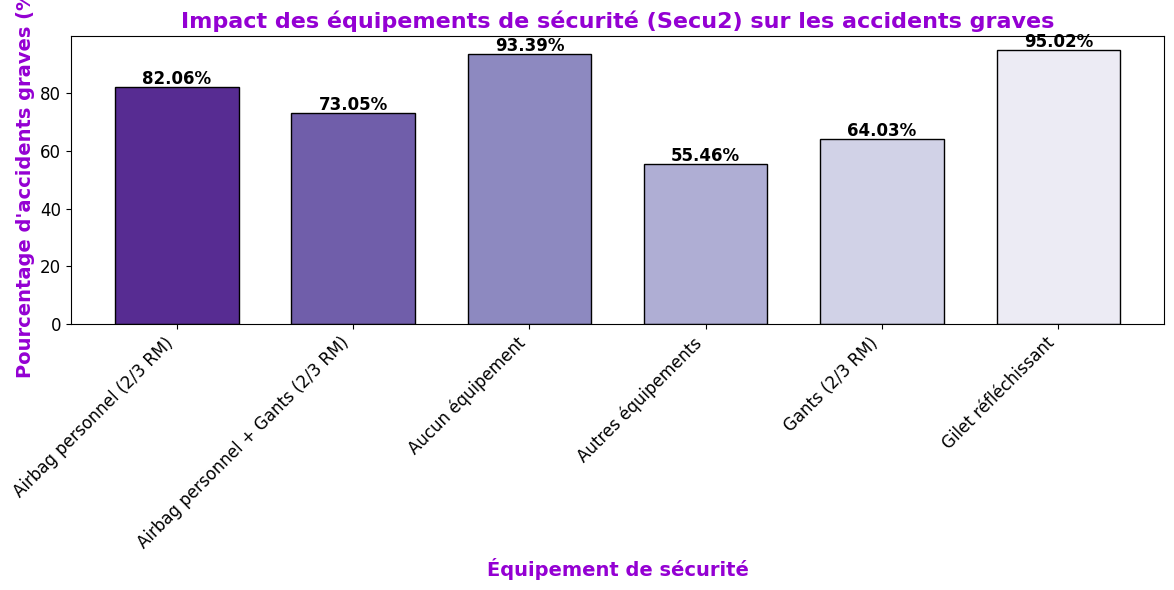

In [19]:
secu1_labels = {
    1: 'Ceinture',
    2: 'Casque',
    3: 'Dispositif enfants',
    8: 'Non d√©terminable'
}

secu2_labels = {
    0: 'Aucun √©quipement',
    4: 'Gilet r√©fl√©chissant',
    5: 'Airbag personnel (2/3 RM)',
    6: 'Gants (2/3 RM)',
    7: 'Airbag personnel + Gants (2/3 RM)',
    9: 'Autres √©quipements'
}
secu3_labels = {
    -1: "Non renseign√©",
    0: "Aucun √©quipement",
    1: "Ceinture",
    2: "Casque",
    3: "Dispositif enfants",
    4: "Gilet r√©fl√©chissant",
    5: "Airbag (2RM/3RM)",
    6: "Gants (2RM/3RM)",
    7: "Gants + Airbag (2RM/3RM)",
    8: "Non d√©terminable",
    9: "Autre"
}

# Mapping des libell√©s sur le DataFrame
df_usagers['secu1_label'] = df_usagers['secu1'].map(secu1_labels)
df_usagers['secu2_label'] = df_usagers['secu2'].map(secu2_labels)
df_usagers['secu3_label'] = df_usagers['secu3'].map(secu2_labels)

df_usagers['accident_grave'] = df_usagers['grav'].apply(lambda x: 1 if x in [1, 4] else 0)

# 1. √âtude de l'utilisation des dispositifs de s√©curit√©
secu1_usage = df_usagers['secu1_label'].value_counts(normalize=True) * 100
secu2_usage = df_usagers['secu2_label'].value_counts(normalize=True) * 100
secu3_usage = df_usagers['secu3_label'].value_counts(normalize=True) * 100
#print("\nR√©partition des dispositifs de s√©curit√© (secu1) :")
#print(tabulate(secu1_usage.reset_index(), headers=["Dispositif de s√©curit√©", "Pourcentage (%)"], tablefmt="pretty", floatfmt=".2f"))

# Visualisation de l'utilisation des dispositifs de s√©curit√© (secu1)
plt.figure(figsize=(10, 6))
secu1_usage.plot(kind='bar', color=sns.color_palette("Blues_r", len(secu1_usage)), edgecolor='black', width=0.7)

plt.title('Utilisation des dispositifs de s√©curit√© (Secu1)', fontsize=16, weight='bold', color='navy')
plt.xlabel('Dispositif de s√©curit√©', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Pourcentage (%)', fontsize=14, weight='bold', color='darkblue')

# Ajouter les pourcentages au-dessus des barres
for i, value in enumerate(secu1_usage):
    plt.text(i, value + 1, f"{value:.2f}%", ha='center', fontsize=12, color='black', weight='bold')

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

print("\nR√©partition des √©quipements de s√©curit√© (secu2) :")
print(tabulate(secu2_usage.reset_index(), headers=["√âquipement de s√©curit√©", "Pourcentage (%)"], tablefmt="pretty", floatfmt=".2f"))

# Visualisation de l'utilisation des √©quipements de s√©curit√© (secu2)
plt.figure(figsize=(12, 6))

secu2_usage.plot(kind='bar', color=sns.color_palette("YlOrRd", len(secu2_usage)), edgecolor='black', width=0.7)

plt.title('Utilisation des √©quipements de s√©curit√© (Secu2)', fontsize=16, weight='bold', color='darkred')
plt.xlabel('√âquipement de s√©curit√©', fontsize=14, weight='bold', color='darkred')
plt.ylabel('Pourcentage (%)', fontsize=14, weight='bold', color='darkred')

# Ajouter les pourcentages au-dessus des barres
for i, value in enumerate(secu2_usage):
    plt.text(i, value + 1, f"{value:.2f}%", ha='center', fontsize=12, color='black', weight='bold')

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 2. Comparaison des taux de blessures graves ou de d√©c√®s
impact_secu1 = df_usagers.groupby('secu1_label')['accident_grave'].mean() * 100
impact_secu2 = df_usagers.groupby('secu2_label')['accident_grave'].mean() * 100

print("\nImpact des dispositifs de s√©curit√© (Secu1) sur les accidents graves (en %) :")
print(tabulate(impact_secu1.reset_index(), headers=["dispositifs de s√©curit√©", "Pourcentage (%)"], tablefmt="pretty", floatfmt=".2f"))

# Visualisation de l'impact des dispositifs de s√©curit√© sur les accidents graves (secu1)
plt.figure(figsize=(10, 6))
impact_secu1.plot(kind='bar', color=sns.color_palette("Greens_r", len(impact_secu1)), edgecolor='black', width=0.7)
plt.title('Impact des dispositifs de s√©curit√© (Secu1) sur les accidents graves', fontsize=16, weight='bold', color='darkgreen')
plt.xlabel('Dispositif de s√©curit√©', fontsize=14, weight='bold', color='darkgreen')
plt.ylabel('Pourcentage d\'accidents graves (%)', fontsize=14, weight='bold', color='darkgreen')

# Ajouter les pourcentages au-dessus des barres
for i, value in enumerate(impact_secu1):
    plt.text(i, value + 1, f"{value:.2f}%", ha='center', fontsize=12, color='black', weight='bold')

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

print("\nImpact des √©quipements de s√©curit√© (Secu2) sur les accidents graves (en %) :")
print(tabulate(impact_secu2.reset_index(), headers=["√âquipement de s√©curit√©", "Pourcentage (%)"], tablefmt="pretty", floatfmt=".2f"))

# Visualisation de l'impact des √©quipements de s√©curit√© sur les accidents graves (secu2)
plt.figure(figsize=(12, 6))
impact_secu2.plot(kind='bar', color=sns.color_palette("Purples_r", len(impact_secu2)), edgecolor='black', width=0.7)
plt.title('Impact des √©quipements de s√©curit√© (Secu2) sur les accidents graves', fontsize=16, weight='bold', color='darkviolet')
plt.xlabel('√âquipement de s√©curit√©', fontsize=14, weight='bold', color='darkviolet')
plt.ylabel('Pourcentage d\'accidents graves (%)', fontsize=14, weight='bold', color='darkviolet')

# Ajouter les pourcentages au-dessus des barres
for i, value in enumerate(impact_secu2):
    plt.text(i, value + 1, f"{value:.2f}%", ha='center', fontsize=12, color='black', weight='bold')

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()



In [ ]:
## R√©partition des dispositifs de s√©curit√© (Secu1 et Secu2)

#En examinant la r√©partition des dispositifs de s√©curit√© secu1, on constate que la ceinture 
# de s√©curit√© est l'√©quipement le plus fr√©quemment utilis√©, avec 65,63 % des usagers. 
# Le casque suit avec 19,79 %, tandis que les dispositifs pour enfants repr√©sentent 
# une part marginale, √† 0,65 %. Une proportion non n√©gligeable (13,92 %) des √©quipements n'est pas d√©termin√©e,
#  ce qui pourrait indiquer un manque de donn√©es ou d'informations sur certains usagers.

#Pour secu2, une majorit√© (74,62 %) des usagers impliqu√©s dans les accidents ne portaient aucun 
# √©quipement sp√©cifique. Parmi ceux qui portaient des √©quipements, les gants (2/3 RM) sont 
# les plus courants (19,88 %), suivis des gilets r√©fl√©chissants (2,54 %) et
# des airbags personnels (2/3 RM) (1,93 %). Les autres √©quipements et 
# les combinaisons airbag personnel + gants (2/3 RM) repr√©sentent des proportions plus faibles (0,78 % et 0,23 %, respectivement).


## Impact des dispositifs de s√©curit√© sur la gravit√© des accidents

#L'analyse laisse croire √† une relation entre l'utilisation des dispositifs de s√©curit√© (secu1) 
# et la gravit√© des accidents. Les usagers portant des dispositifs pour enfants enregistrent
#  le pourcentage le plus √©lev√© d'accidents graves √† 90,91 %, suivi 
# par ceux portant la ceinture de s√©curit√© (89,39 %). Les usagers avec des √©quipements non d√©terminables 
# enregistrent √©galement un impact √©lev√© (83,32 %), tandis que ceux portant un casque pr√©sentent un pourcentage moindre (65,38 %).

#En ce qui concerne les √©quipements sp√©cifiques (secu2), les usagers portant des gilets r√©fl√©chissants (95,02 %) pr√©sentent le pourcentage
#d'accidents le plus √©lev√©, suivi par ceux ne portant aucun √©quipement(93,39 %) . 
# √Ä l'inverse, les usagers portant des gants (2/3 RM) et des airbags personnels + gants enregistrent des impacts plus mod√©r√©s, √† 64,03 % et 73,05 %, respectivement. 
#Enfin, ceux portant d'autres √©quipements affichent le pourcentage le plus faible d'accidents graves (55,46 %), indiquant une meilleure protection potentielle.

Analyse des trajets

In [ ]:
trajet_labels = {
    0: 'Non renseign√©',
    1: 'Domicile-travail',
    2: 'Domicile-√©cole',
    3: 'Courses-achats',
    4: 'Utilisation professionnelle',
    5: 'Promenade-loisirs',
    9: 'Autre'
}

df_usagers['trajet_label'] = df_usagers['trajet'].map(trajet_labels)

# Calcul des fr√©quences et proportions
trajet_counts = df_usagers['trajet_label'].value_counts()
trajet_proportions = df_usagers['trajet_label'].value_counts(normalize=True) * 100

trajet_summary = pd.DataFrame({
    'Fr√©quence': trajet_counts,
    'Proportion (%)': trajet_proportions
}).sort_values(by='Fr√©quence', ascending=False)

print("\nStatistiques descriptives de la variable 'trajet' :")
print(tabulate(trajet_summary.reset_index(), headers=["Type de trajet", "Fr√©quence", "Proportion (%)"], tablefmt="pretty", floatfmt=".2f"))

# Distribution des types de trajets
plt.figure(figsize=(12, 7))
sns.barplot(x=trajet_counts.values, y=trajet_counts.index, palette='coolwarm_r')  # Palette invers√©e

plt.title("Distribution des types de trajets li√©s aux accidents", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Nombre d'accidents", fontsize=14, fontweight='bold', color='green')
plt.ylabel("Type de trajet", fontsize=14, fontweight='bold', color='green')
plt.xticks(fontsize=12, color='purple')
plt.yticks(fontsize=12, color='purple')
plt.tight_layout()
plt.show()


#Les statistiques montrent que les promenades-loisirs dominent les motifs de d√©placement des usagers impliqu√©s dans des accidents,
#  repr√©sentant 37,42 %, suivies des trajets non renseign√©s (27,01 %).
#  Les trajets domicile-travail (13,36 %) et utilisation professionnelle (8,92 %) r√©v√®lent l'importance des d√©placements li√©s √† l'activit√© 
# professionnelle, totalisant 22,28 %, et pointent des enjeux sp√©cifiques comme les risques associ√©s aux heures de pointe, au stress, 
# et √† la fatigue. Les trajets domicile-√©cole (2,42 %) et les d√©placements pour courses-achats (2,92 %) ont une contribution moindre.

Analyse descriptive des localisations, actions et √©tats des pi√©tons

In [ ]:
locp_labels = {
    0: 'Sans objet',
    1: 'A + de 50 m du passage pi√©ton',
    2: 'A - de 50 m du passage pi√©ton',
    3: 'Sans signalisation lumineuse',
    4: 'Avec signalisation lumineuse',
    5: 'Trottoir',
    6: 'Sur accotement ou BAU',
    7: 'Sur contre-all√©e',
    8: 'Inconnue'
}                                                                                                                                  
actp_labels = {
    '-1': 'Non renseign√©',
    '0': 'Sans objet',
    '1': 'Sens du v√©hicule heurtant',
    '2': 'Sens inverse du v√©hicule heurtant',
    '3': 'Traversant',
    '4': 'Masqu√©',
    '5': 'Jouant-courant',
    '6': 'Avec animal',
    '7': 'Quitte l arr√™t du TC',
    '8': 'Acc√®de √† l arr√™t du TC',
    '9': 'Autre',
    'A': 'Monte ou descend de son v√©hicule', 
    'B': 'Inconnu'  
}

etatp_labels = {
    0: 'Sans objet',
    1: 'Seul',
    2: 'Accompag√©',
    3: 'En groupe'
}


# Appliquer les mappings aux colonnes
df_usagers['locp_label'] = df_usagers['locp'].map(locp_labels)
df_usagers['actp_label'] = df_usagers['actp'].map(actp_labels)
df_usagers['etatp_label'] = df_usagers['etatp'].map(etatp_labels)

# Analyse descriptive : Fr√©quences et proportions
def summarize_variable(column, label):
    counts = df_usagers[column].value_counts()
    proportions = df_usagers[column].value_counts(normalize=True) * 100
    summary = pd.DataFrame({'Fr√©quence': counts, 'Proportion (%)': proportions})
    print(f"\nStatistiques descriptives pour {label} :")
    print(tabulate(summary, headers=["Cat√©gorie", "Fr√©quence_d_observation", "Proportion (%)"], tablefmt="pretty", floatfmt=".2f"))
    return summary

locp_summary = summarize_variable('locp_label', 'Localisation du pi√©ton')
actp_summary = summarize_variable('actp_label', 'Action du pi√©ton')
etatp_summary = summarize_variable('etatp_label', '√âtat du pi√©ton')

# Visualisations avec am√©liorations
def plot_distribution(summary, title, ylabel):
    plt.figure(figsize=(12, 7))
    sns.barplot(x=summary['Fr√©quence'], y=summary.index, palette='magma')  # Utilisation de la palette 'magma' pour une jolie couleur
    plt.title(title, fontsize=16, fontweight='bold', color='darkblue')
    plt.xlabel("Nombre d'accidents", fontsize=14, fontweight='bold', color='green')
    plt.ylabel(ylabel, fontsize=14, fontweight='bold', color='green')
    plt.xticks(fontsize=12, color='purple')
    plt.yticks(fontsize=12, color='purple')
    plt.tight_layout()
    plt.show()

plot_distribution(locp_summary, "Distribution de la localisation des pi√©tons", "Localisation")
plot_distribution(actp_summary, "Distribution des actions des pi√©tons", "Action")
plot_distribution(etatp_summary, "Distribution de l'√©tat des pi√©tons", "√âtat")

# Analyse crois√©e (Localisation vs Action)
cross_tab = pd.crosstab(df_usagers['locp_label'], df_usagers['actp_label'], normalize='index') * 100
cross_tab = cross_tab.fillna(0)  # Remplacer NaN par 0

plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'Pourcentage'})
plt.title("Croisement entre localisation et action des pi√©tons", fontsize=16)
plt.xlabel("Action du pi√©ton", fontsize=14)
plt.ylabel("Localisation du pi√©ton", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
#### Localisation du pi√©ton (locp_label) :
#La majorit√© des pi√©tons (84,5 %) se trouvent dans des zones sans objet de localisation pr√©cise. Parmi les autres cat√©gories, 
# la majorit√© se situe √† plus de 50 m√®tres d'un passage pi√©ton (5,3 %) et √† moins de 50 m√®tres (3,2 %). 
# La signalisation lumineuse est pr√©sente dans seulement 2,5 % des cas, et un peu plus de 2 % des pi√©tons se trouvent dans des zones 
# √† plus de 50 m√®tres du passage pi√©ton. La localisation pr√©cise de l'accident est inconnue dans moins de 1 % des cas, et seules de rares 
# observations concernent des pi√©tons sur des trottoirs (1,4 %) ou sur des accotements (0,5 %).
##########

#### Action du pi√©ton (actp_label) :
#La majorit√© des pi√©tons (83,8 %) sont dans une situation o√π l'action est consid√©r√©e comme "sans objet". 
# Les actions les plus fr√©quentes sont les pi√©tons traversant (11,9 %) ou des actions consid√©r√©es comme "autres" (1,1 %). 
# Les cas o√π le pi√©ton est heurt√© dans le sens du v√©hicule sont relativement moins fr√©quents (1 %), tout comme les situations o√π
#  il se trouve dans le sens inverse du v√©hicule heurtant (0,5 %). D'autres actions comme "jouant-courant", "avec animal" ou "masqu√©" 
# sont tr√®s peu fr√©quentes, avec des proportions inf√©rieures √† 1 %, et les cas o√π le pi√©ton monte ou descend de son v√©hicule ou acc√®de 
# √† un arr√™t de transport en commun sont rares (moins de 0,2 %).
##########

#### √âtat du pi√©ton (etatp_label) :
# La grande majorit√© des pi√©tons sont seuls lors de l'accident (75,2 %), tandis qu'une proportion importante est accompagn√©e (20,7 %). 
# Les cas o√π le pi√©ton est en groupe sont beaucoup moins fr√©quents, repr√©sentant seulement 4,1 % des observations.

####################Croisements 
#Les r√©sultats montrent une tendance g√©n√©rale o√π la majorit√© des pi√©tons traversent la rue de mani√®re traversante,
#avec une gande proportion d'actions marqu√©es par l'absence de signalisation ou l'absence de comportement sp√©cifique ("Sans objet").
#Les localisations pr√®s des passages pi√©tons montrent une plus grande tendance √† traverser de mani√®re traversante, mais des comportements
#tels que "Sens du v√©hicule heurtant" ou "Autre" sont plus fr√©quents dans des zones o√π la signalisation lumineuse ou les trottoirs sont moins pr√©sents.

#Il semble aussi qu'une partie des actions li√©es aux transports en commun ("Acc√®de √† l‚Äôarr√™t du TC", "Quitte l‚Äôarr√™t du TC") 
#soit relativement faible, bien que certaines localisations, comme "Inconnue" et "Sur accotement ou BAU", montrent une certaine
#vari√©t√© dans les actions des pi√©tons.

Tableau crois√© dynamique pour observer les relations entre les variables

In [ ]:
#Matrice de corr√©lation
col_a_exclu = ['Num_Acc','an_nais']
df_usagers_col_a_exclu = df_usagers.drop(columns=col_a_exclu)
df_numeric = df_usagers_col_a_exclu.select_dtypes(include=['number'])
corr_USAGERS = df_numeric.corr(method="pearson")

plt.figure(figsize=(10, 8))
sns.heatmap(corr_USAGERS, annot=True, cmap='coolwarm', fmt='.2f', 
            xticklabels=corr_USAGERS.columns, yticklabels=corr_USAGERS.columns)

plt.title("Matrice de Corr√©lation des Variables Usagers")
plt.show()

#Selon le tableau de corr√©lation les variables couples de variables fortement corr√©l√©es sont: (place, catu), (place,locp), (place,etatp), (catu,etatp) et (locp,etatp)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# S√©lection des variables num√©riques
df_usagers_col_a_exclu = df_usagers.drop(columns=col_a_exclu)
df_numeric = df_usagers_col_a_exclu.select_dtypes(include=['number'])

# Cr√©ation du widget Dropdown
variable_selector = widgets.Dropdown(
    options=df_numeric.columns.tolist(),
    description='Variable:',
    disabled=False
)

# Fonction pour afficher le boxplot
def show_boxplot(variable):
    # V√©rifier si la variable existe dans le DataFrame
    if variable in df_numeric.columns:
        plt.figure(figsize=(10, 6))
        sns.set(style="whitegrid")
        # Cr√©er un boxplot avec une couleur personnalis√©e et une taille de bo√Æte ajust√©e
        sns.boxplot(x=df_usagers[variable], 
                    color='lightcoral', 
                    width=0.5,          
                    fliersize=7,        
                    linewidth=2,        
                    whis=1.5)           

        plt.title(f'Boxplot de {variable}', fontsize=18, fontweight='bold')

        plt.xlabel(variable, fontsize=14)
        plt.ylabel('Valeur', fontsize=14)

        # Afficher la grille pour rendre les graphes plus lisibles
        plt.grid(True, axis='y', linestyle='--', alpha=0.7)

        # Personnaliser la couleur des axes et ajouter un fond doux
        plt.gca().set_facecolor('whitesmoke')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)

        # Afficher le graphique
        plt.show()
    else:
        print("La variable sp√©cifi√©e n'existe pas dans les donn√©es.")

# Affichage du widget pour permettre l'interaction
display(variable_selector)

# Lier le widget avec la fonction de boxplot
widgets.interactive(show_boxplot, variable=variable_selector)


In [ ]:
col_a_exclu = ['Num_Acc','an_nais','sexe']
df_usagers_col_a_exclu = df_usagers.drop(columns=col_a_exclu)

df_numeric = df_usagers_col_a_exclu.select_dtypes(include=['number'])

variable_selector = widgets.Dropdown(
    options=df_numeric.columns.tolist(),
    description='Variable:',
    disabled=False
)

# Fonction pour afficher le boxplot
def show_boxplot(variable):
    # V√©rifier si la variable existe dans le DataFrame
    if variable in df_numeric.columns:
        plt.figure(figsize=(10, 6))
        sns.set(style="whitegrid")
        # Cr√©er un boxplot avec une couleur personnalis√©e et une taille de bo√Æte ajust√©e
        sns.boxplot(x=df_usagers[variable], 
                    color='lightcoral', 
                    width=0.5,          
                    fliersize=7,        
                    linewidth=2,        
                    whis=1.5)           

        plt.title(f'Boxplot de {variable}', fontsize=18, fontweight='bold')

        plt.xlabel(variable, fontsize=14)
        plt.ylabel('Valeur', fontsize=14)

        # Afficher la grille pour rendre les graphes plus lisibles
        plt.grid(True, axis='y', linestyle='--', alpha=0.7)

        # Personnaliser la couleur des axes et ajouter un fond doux
        plt.gca().set_facecolor('whitesmoke')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)

        # Afficher le graphique
        plt.show()

    else:
        print("La variable sp√©cifi√©e n'existe pas dans les donn√©es.")

# Lier le widget avec la fonction de boxplot
widgets.interactive(show_boxplot, variable=variable_selector)



### 2)- Description de la base vehicules

Dictionnaire des variables

In [ ]:
#Sens de circulation 
senc_labels = {
    '-1': '-1 Non renseign√©',
    0: '0 Inconnu',
    1: '1 PK ou PR ou num√©ro d\'adresse postale croissant',
    2: '2 PK ou PR ou num√©ro d\'adresse postale d√©croissant',
    3: '3 Absence de rep√®re'
}
#obstacles_fixes_heurte
obs_labels = {
    '-1': "Non renseign√©",
    0: "Sans objet",
    1: "V√©hicule en stationnement",
    2: "Arbre",
    3: "Glissi√®re m√©tallique",
    4: "Glissi√®re b√©ton",
    5: "Autre glissi√®re",
    6: "B√¢timent, mur, pile de pont",
    7: "Support de signalisation verticale ou poste d‚Äôappel d‚Äôurgence",
    8: "Poteau",
    9: "Mobilier urbain",
    10: "Parapet",
    11: "Ilot, refuge, borne haute",
    12: "Bordure de trottoir",
    13: "Foss√©, talus, paroi rocheuse",
    14: "Autre obstacle fixe sur chauss√©e",
    15: "Autre obstacle fixe sur trottoir ou accotement",
    16: "Sortie de chauss√©e sans obstacle",
    17: "Buse ‚Äì t√™te d‚Äôaqueduc"
}
#Cat√©gorie du v√©hicule
catv_labels = {
    0: "Ind√©terminable",
    1: "Bicyclette",
    2: "Cyclomoteur <50cm3",
    3: "Voiturette (Quadricycle √† moteur carross√©) (anciennement 'voiturette ou tricycle √† moteur')",
    4: "R√©f√©rence inutilis√©e depuis 2006 (scooter immatricul√©)",
    5: "R√©f√©rence inutilis√©e depuis 2006 (motocyclette)",
    6: "R√©f√©rence inutilis√©e depuis 2006 (side-car)",
    7: "VL seul",
    8: "R√©f√©rence inutilis√©e depuis 2006 (VL + caravane)",
    9: "R√©f√©rence inutilis√©e depuis 2006 (VL + remorque)",
    10: "VU seul 1,5T <= PTAC <= 3,5T avec ou sans remorque (anciennement VU seul 1,5T <= PTAC <= 3,5T)",
    11: "R√©f√©rence inutilis√©e depuis 2006 (VU (10) + caravane)",
    12: "R√©f√©rence inutilis√©e depuis 2006 (VU (10) + remorque)",
    13: "PL seul 3,5T <PTCA <= 7,5T",
    14: "PL seul > 7,5T",
    15: "PL > 3,5T + remorque",
    16: "Tracteur routier seul",
    17: "Tracteur routier + semi-remorque",
    18: "R√©f√©rence inutilis√©e depuis 2006 (transport en commun)",
    19: "R√©f√©rence inutilis√©e depuis 2006 (tramway)",
    20: "Engin sp√©cial",
    21: "Tracteur agricole",
    30: "Scooter < 50 cm3",
    31: "Motocyclette > 50 cm3 et <= 125 cm3",
    32: "Scooter > 50 cm3 et <= 125 cm3",
    33: "Motocyclette > 125 cm3",
    34: "Scooter > 125 cm3",
    35: "Quad l√©ger <= 50 cm3 (Quadricycle √† moteur non carross√©)",
    36: "Quad lourd > 50 cm3 (Quadricycle √† moteur non carross√©)",
    37: "Autobus",
    38: "Autocar",
    39: "Train",
    40: "Tramway",
    41: "3RM <= 50 cm3",
    42: "3RM > 50 cm3 <= 125 cm3",
    43: "3RM > 125 cm3",
    50: "EDP √† moteur",
    60: "EDP sans moteur",
    80: "VAE",
    99: "Autre v√©hicule"
}
#Obstacle mobile heurt√©
obsm_labels = {
    '-1': "Non renseign√©",
    0: "Aucun",
    1: "Pi√©ton",
    2: "V√©hicule",
    4: "V√©hicule sur rail",
    5: "Animal domestique",
    6: "Animal sauvage",
    9: "Autre"
}
#point_de_choc_initial
choc_labels = {
    '-1': "Non renseign√©",
    0: "Aucun",
    1: "Avant",
    2: "Avant droit",
    3: "Avant gauche",
    4: "Arri√®re",
    5: "Arri√®re droit",
    6: "Arri√®re gauche",
    7: "C√¥t√© droit",
    8: "C√¥t√© gauche",
    9: "Chocs multiples (tonneaux)"
}
#manoeuvre_principale_avant_accident
manv_labels = {
    '-1': "Non renseign√©",
    0: "Inconnue",
    1: "Sans changement de direction",
    2: "M√™me sens, m√™me file",
    3: "Entre 2 files",
    4: "En marche arri√®re",
    5: "A contresens",
    6: "En franchissant le terre-plein central",
    7: "Dans le couloir bus, dans le m√™me sens",
    8: "Dans le couloir bus, dans le sens inverse",
    9: "En s‚Äôins√©rant",
    10: "En faisant demi-tour sur la chauss√©e"
}
#type_motorisation_vehicule
motor_labels = {
    '-1': "Non renseign√©",
    0: "Inconnue",
    1: "Hydrocarbures",
    2: "Hybride √©lectrique",
    3: "Electrique",
    4: "Hydrog√®ne",
    5: "Humaine",
    6: "Autre"
}

In [6]:
#Pourcentage de valeurs manquantes pour chaque variable
missing_percentage = (df_vehicules.isnull().sum() / len(df_vehicules)) * 100
print("Pourcentage de valeurs manquantes par variable :")
print(missing_percentage)

Pourcentage de valeurs manquantes par variable :
Num_Acc         0.000000
id_vehicule     0.000000
num_veh         0.000000
senc            0.000000
catv            0.000000
obs             0.000000
obsm            0.000000
choc            0.000000
manv            0.000000
motor           0.000000
occutc         99.104557
dtype: float64


In [7]:
# Suppression de la variable 'occutc' car elle a 99% de variables manquantes
df_vehicules = df_vehicules.drop(columns=['occutc'])

In [8]:
mapping_dict = {
    "senc": senc_labels,
    "catv": catv_labels,
    "obs": obs_labels,
    "choc": choc_labels,
    "obsm": obsm_labels,
    "manv": manv_labels,
    "motor": motor_labels,
}
# Application du mapping
for column, mapping in mapping_dict.items():
    if column in df_vehicules.columns:  # V√©rifie si la colonne existe dans le DataFrame
        df_vehicules[column] = df_vehicules[column].map(mapping)


In [48]:
def plot_all_distributions(df, columns):
    """
    Repr√©sente les distributions des variables cat√©gorielles dans un seul cadran avec des sous-graphiques.
    
    Param√®tres:
    df : DataFrame pandas contenant les donn√©es
    columns : Liste des colonnes cat√©gorielles √† repr√©senter
    """
    # Dictionnaire pour mapper les variables aux titres
    column_titles = {
        "senc": "Sens de circulation",
        "obs": "Obstacles fixes heurt√©s",
        "obsm": "Obstacle mobile heurt√©",
        "choc": "Point de choc initial",
        "manv": "Man≈ìuvre principale avant accident",
        "motor": "Type de motorisation du v√©hicule"
    }
    
    # D√©finir le nombre de lignes et de colonnes pour les subplots
    n_cols = 2  # Nombre de colonnes par ligne pour agrandir les graphiques
    n_rows = (len(columns) + n_cols - 1) // n_cols  # Nombre total de lignes (arrondi vers le haut)
    
    # Initialiser la figure avec une taille plus grande
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows))
    axes = axes.flatten()  # Aplatir le tableau des axes pour un acc√®s facile
    
    # Parcourir les colonnes pour cr√©er chaque graphique
    for i, column in enumerate(columns):
        sns.countplot(data=df, x=column, palette='viridis', ax=axes[i])
        title = column_titles.get(column, column)  # R√©cup√©rer le titre ou le nom de la colonne par d√©faut
        axes[i].set_title(f"Distribution de '{title}'", fontsize=14)
        axes[i].set_xlabel(title, fontsize=12)
        axes[i].set_ylabel("Fr√©quence", fontsize=12)
        axes[i].tick_params(axis='x', rotation=45)
        
        # Ajouter les valeurs au-dessus des barres
        for p in axes[i].patches:
            axes[i].annotate(f'{int(p.get_height())}',
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center',
                             fontsize=10, color='black',
                             xytext=(0, 5), textcoords='offset points')
        
    # Supprimer les axes vides si le nombre de graphiques est inf√©rieur aux subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()



/tmp/ipykernel_5953/2874573629.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis', ax=axes[i])
/tmp/ipykernel_5953/2874573629.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis', ax=axes[i])
/tmp/ipykernel_5953/2874573629.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis', ax=axes[i])


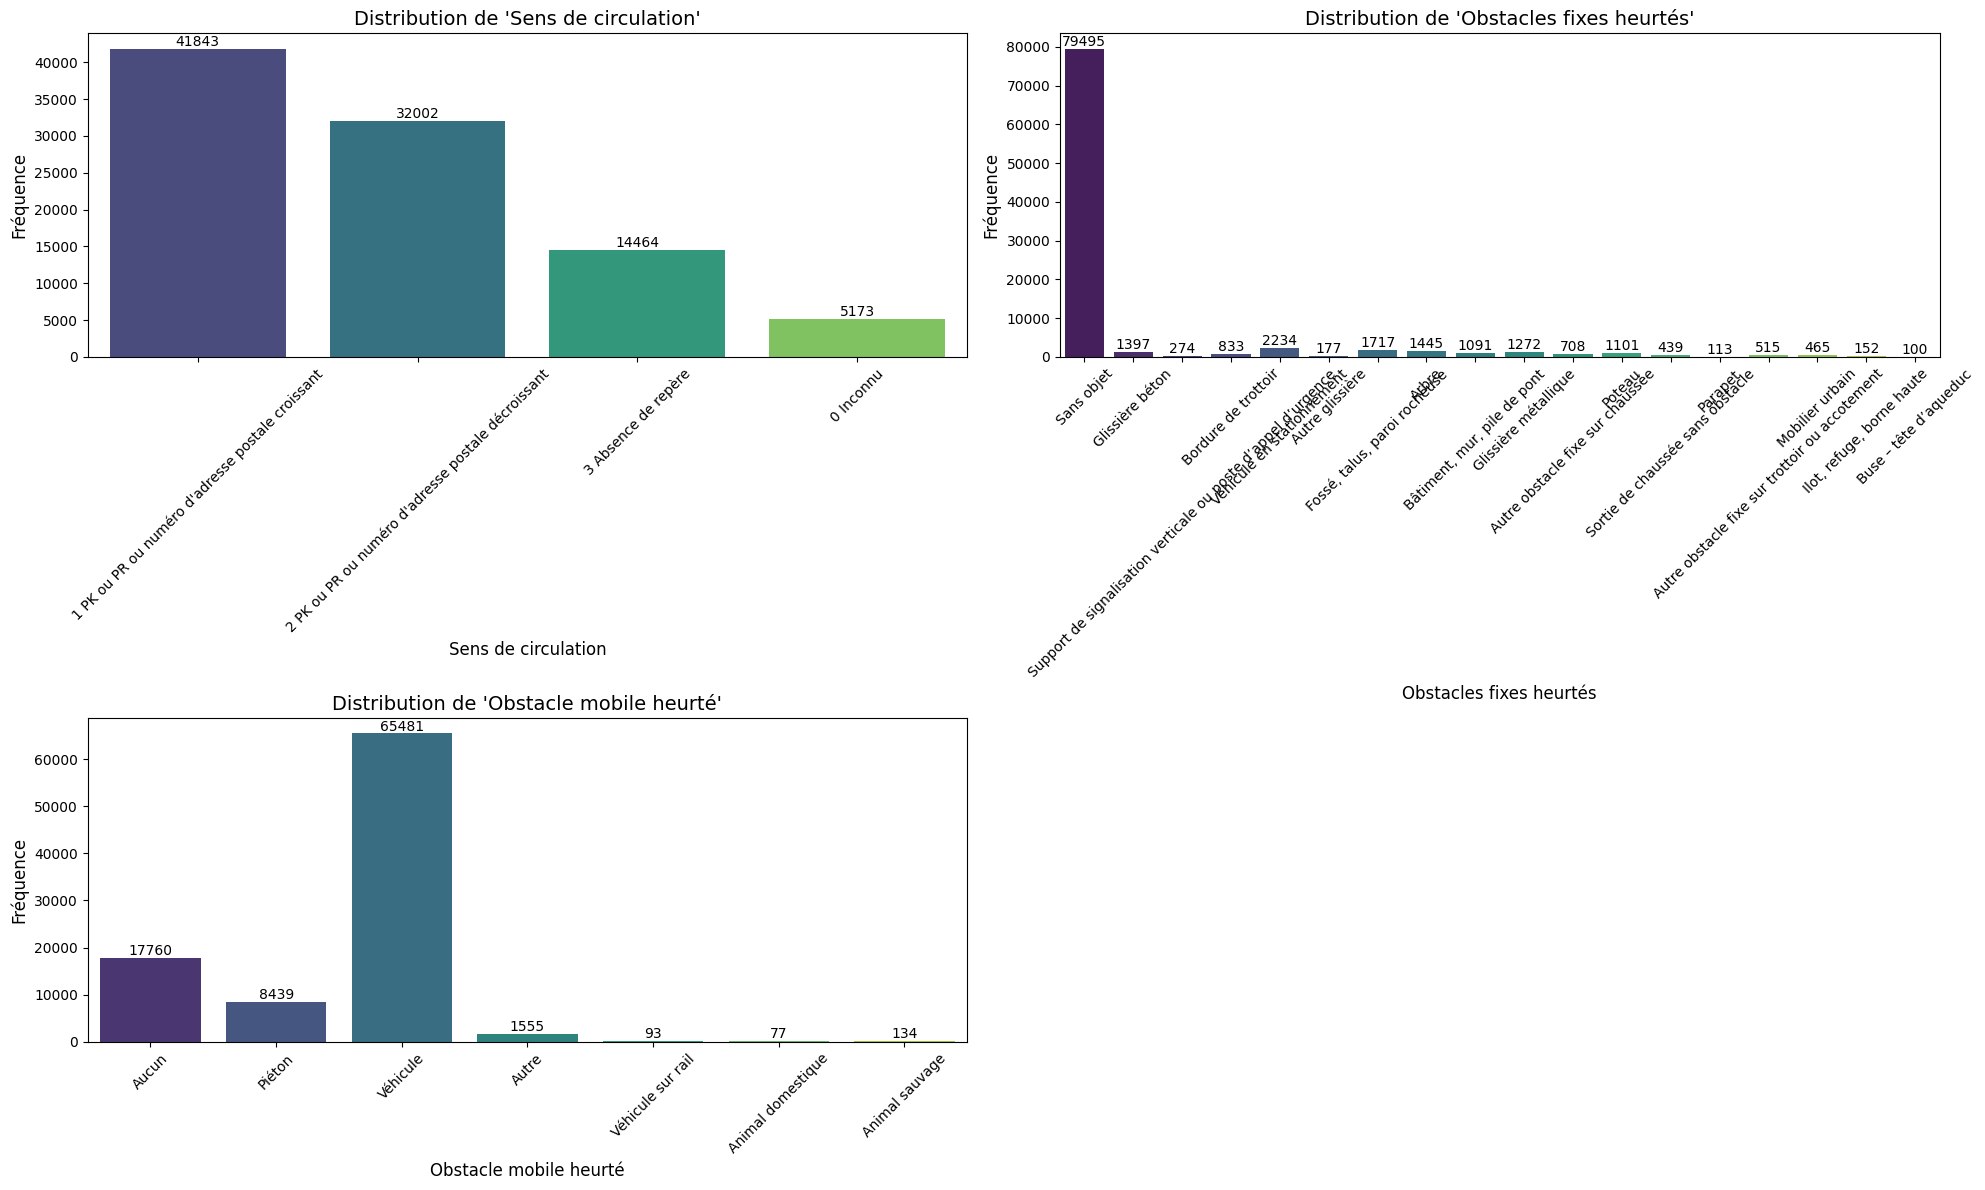

In [49]:
# Liste des colonnes
col_inclure1 = ["senc","obs", "obsm"]
# Appel de la fonction
plot_all_distributions(df_vehicules, col_inclure1)

/tmp/ipykernel_5953/2874573629.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis', ax=axes[i])
/tmp/ipykernel_5953/2874573629.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis', ax=axes[i])
/tmp/ipykernel_5953/2874573629.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis', ax=axes[i])


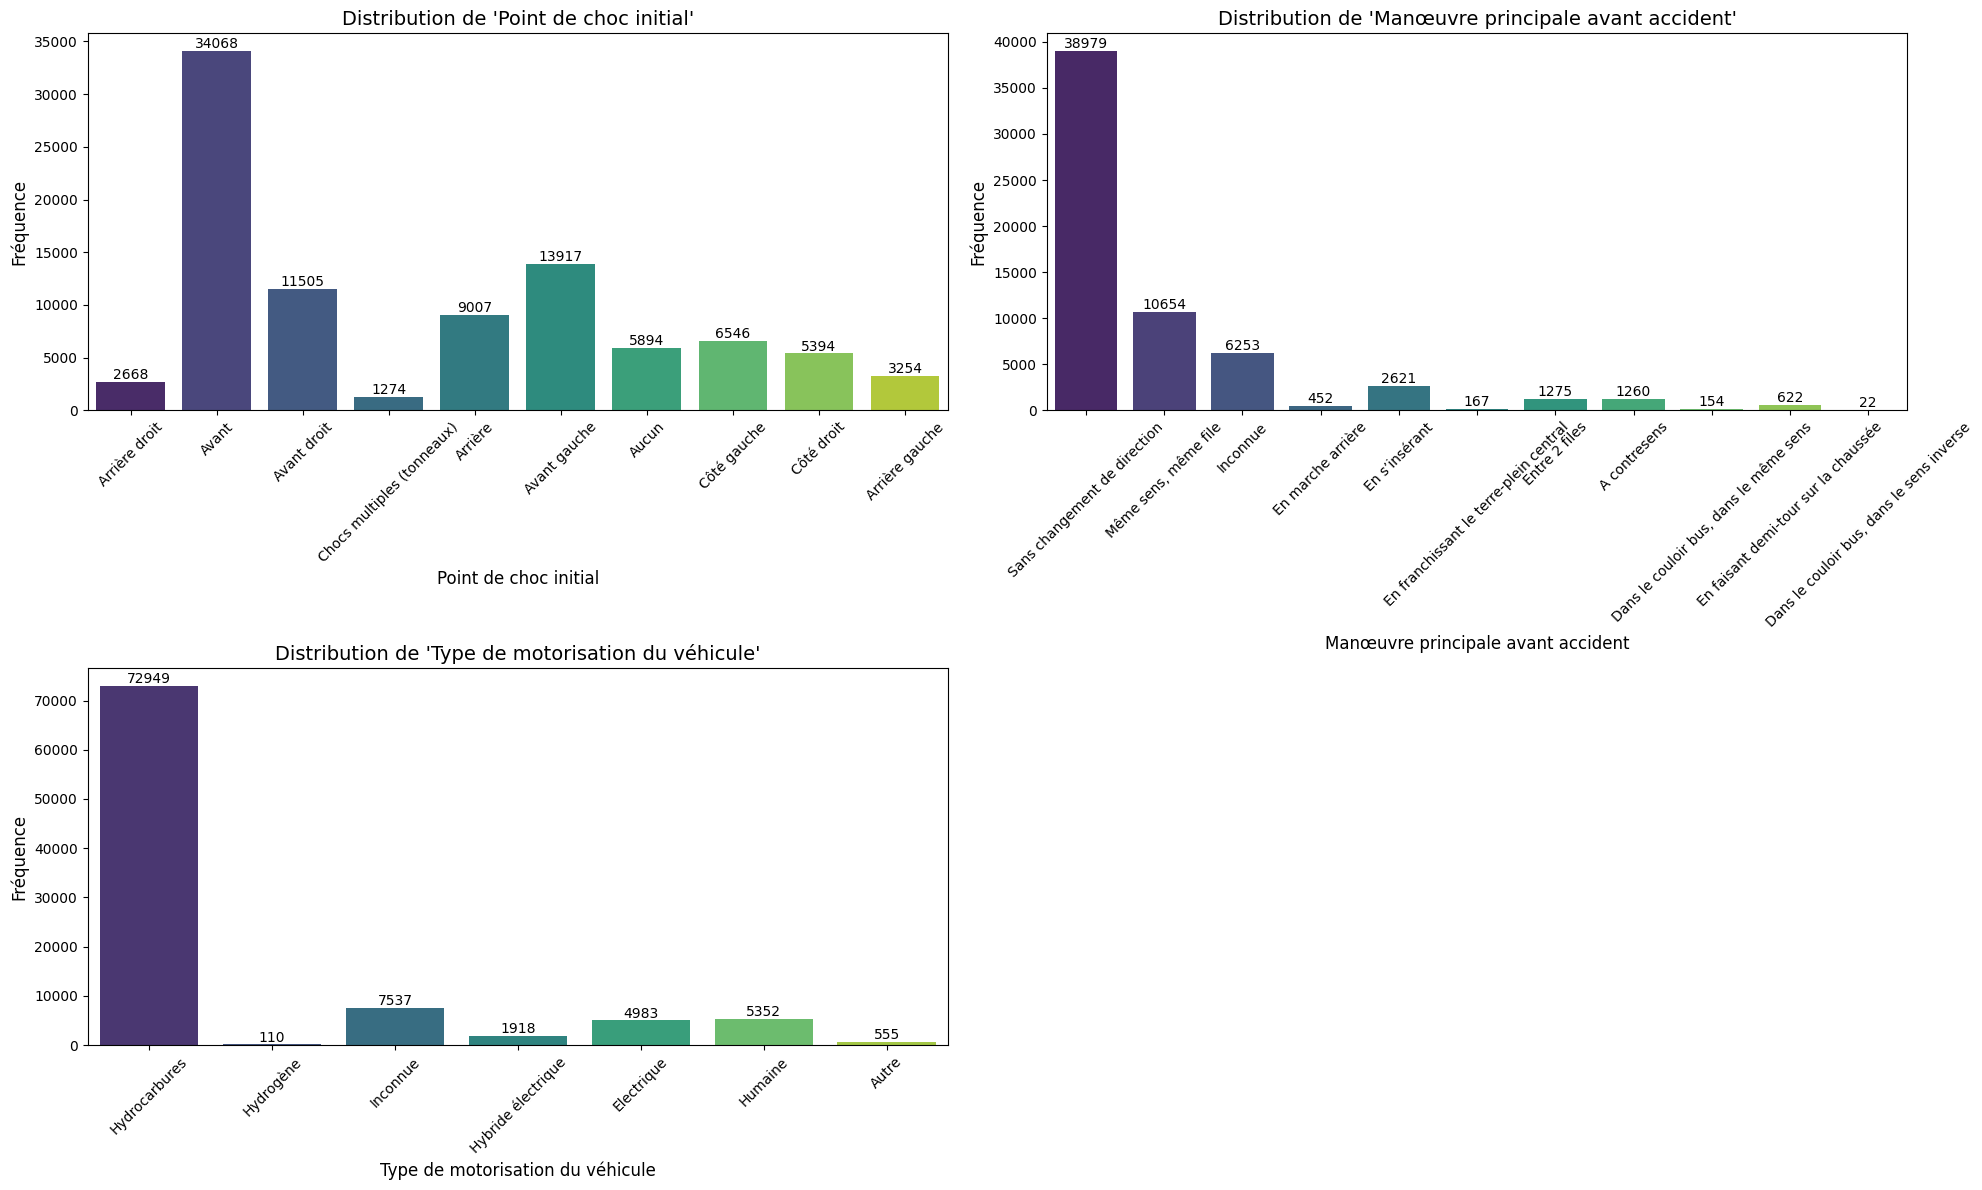

In [50]:
Col_inclure2 = ["choc", "manv", "motor"]
plot_all_distributions(df_vehicules, Col_inclure2)

/tmp/ipykernel_5953/398368961.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df_vehicules["catv"], palette='viridis')


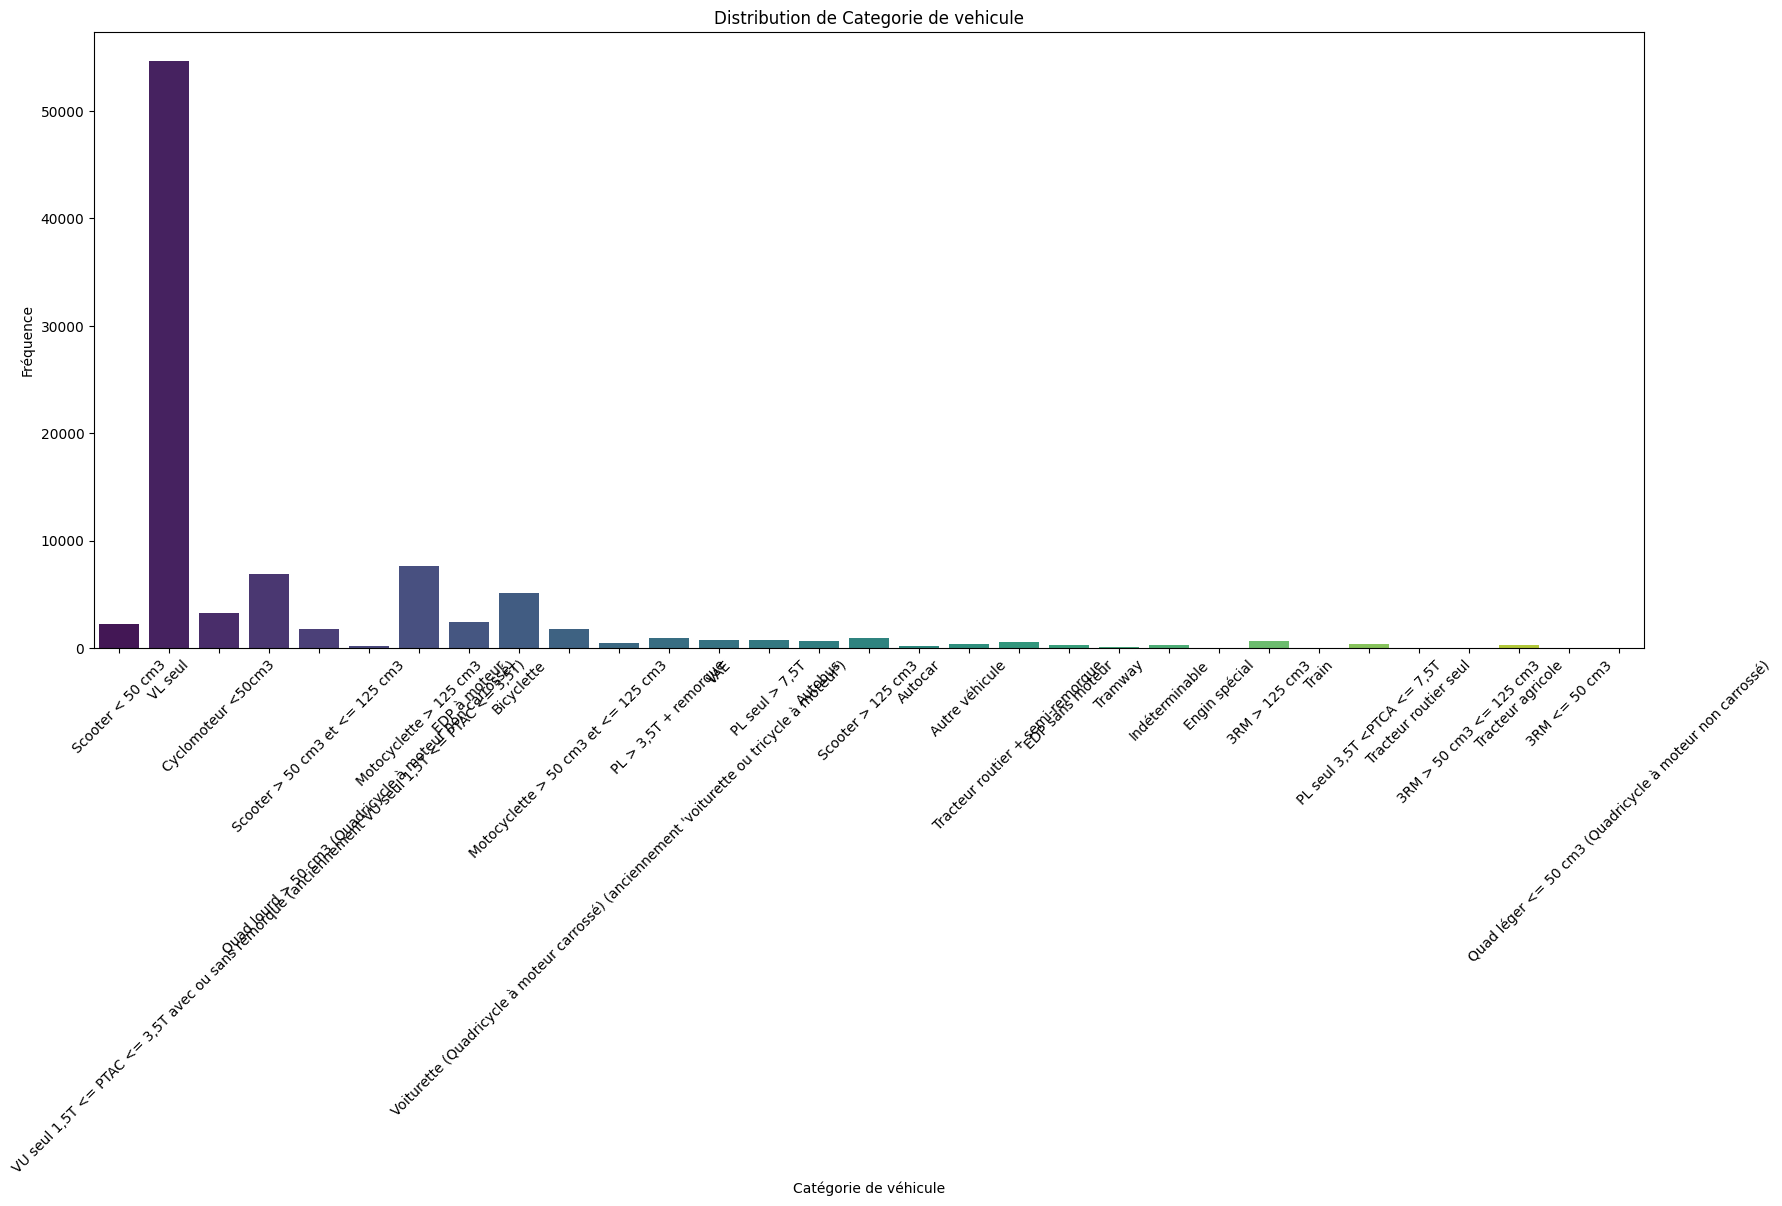

In [47]:
plt.figure(figsize=(20, 8))
ax = sns.countplot(x=df_vehicules["catv"], palette='viridis')
plt.title("Distribution de Categorie de vehicule")
plt.xlabel("Cat√©gorie de v√©hicule")
plt.ylabel("Fr√©quence")
plt.xticks(rotation=45)
plt.show()


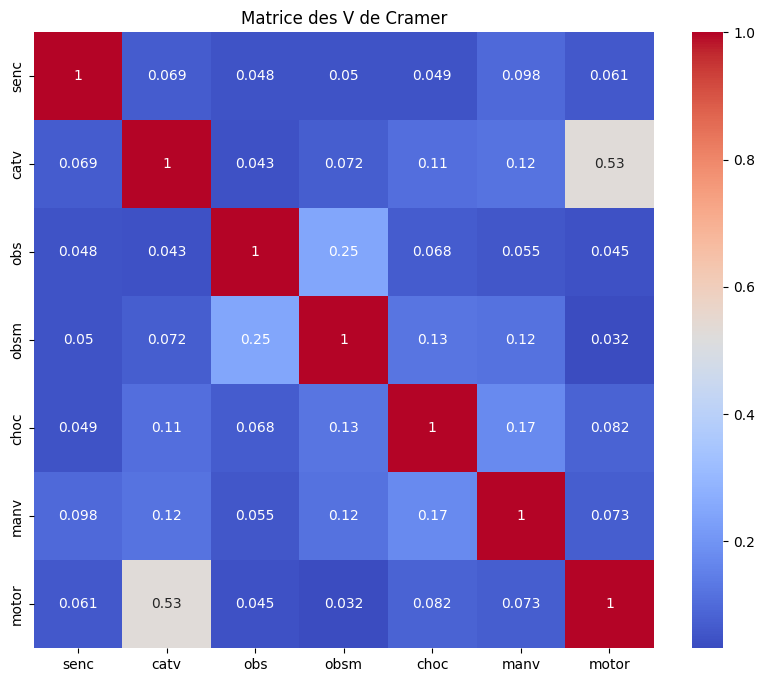

In [15]:
# Matrice des V de Cramer
# Function to calculate Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

colonnes_a_inclure = ["senc", "catv", "obs", "obsm", "choc", "manv", "motor"]
#Cr√©er un DataFrame vide pour la matrice V de Cramer
cramers_v_matrix = pd.DataFrame(index=colonnes_a_inclure, columns=colonnes_a_inclure)

# Calculer les V de Cramer pour chaque paire de colonnes
for col1 in colonnes_a_inclure:
    for col2 in colonnes_a_inclure:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df_vehicules[col1], df_vehicules[col2])

# Convertir la matrice en valeurs num√©riques
cramers_v_matrix = cramers_v_matrix.astype(float)

plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title("Matrice des V de Cramer")
plt.show()

In [ ]:
#Cette matrice des V de Cramer repr√©sente la force des associations entre les variables cat√©goriques nominales de ma base. 
#La matrice des V de Cramer montre que la majorit√© des relations entre les variables sont faiblement associ√©es (ùëâ<0.1), indiquant 
# peu de d√©pendance entre elles et sugg√©rant que chaque variable apporte des informations distinctes. Une exception notable est 
# l‚Äôassociation mod√©r√©e entre motor et catv (V=0.53), ce qui sugg√®re que le type de motorisation d‚Äôun v√©hicule est fortement li√© √† 
# sa cat√©gorie. Une autre relation mod√©r√©e est observ√©e entre obs et obsm (V=0.25), probablement parce que ces deux variables sont 
# li√©es √† des aspects similaires de l‚Äôobservation ou de la man≈ìuvre. Ces r√©sultats confirment la pertinence des variables pour une 
# analyse plus approfondie, tout en indiquant que seules quelques-unes sont fortement li√©es.

In [ ]:
# ajout du libell√© des d√©partements

df_code_dep=df_dep[["DEP","LIBELLE"]]
#df_code_com=df_com[["COM","LIBELLE"]]
df_merge=pd.merge(left=df_merge, right=df_code_dep,left_on="dep", right_on="DEP", how="left")
#database=pd.merge(left=df_merge, right=df_code_com,left_on="com", right_on="COM", how="left")
database=df_merge.drop(["DEP"], axis=1)
database.info()

In [ ]:
print(f"la base usagers a {df_usagers.shape[0]} observations et {df_usagers.shape[1]} variables.")

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
grav_dict={-1:"Non renseign√©",1:'Indemne',2:"Tu√©",3:'Bl√©ss√© hospitalis√©',4:'Bless√© leger'}
grav_nv=df_usagers['grav'].replace(grav_dict)
grav_prct=(grav_nv.value_counts()/df_usagers.shape[0])*100
grav_prct.plot(kind="bar")
plt.xticks(rotation=30)
plt.xlabel("Gravit√© de l'accident")
plt.ylabel("percentage(%)")

plt.subplot(1,2,2)
catu_dict={1:"Conducteur",2:"Passager",3:"Pi√©ton"}
catu_nv=df_usagers['catu'].replace(catu_dict)
catu_prct=(catu_nv.value_counts()/df_usagers.shape[0])*100
catu_prct.plot(kind="bar")
plt.xticks(rotation=30)
plt.xlabel("Cat√©gorie d'usager")
plt.ylabel("percentage(%)")


In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sexe_dict={1:"Homme",2:"Femme"}
sexe_nv=df_usagers['sexe'].replace(sexe_dict)
sexe_prct=(sexe_nv.value_counts()/df_usagers.shape[0])*100
sexe_prct.plot(kind="bar")
plt.xticks(rotation=45)
plt.xlabel("Sexe")
plt.ylabel("percentage(%)")


plt.subplot(1,2,2)
#grav_dict={-1:"Non renseign√©",1:'Indemne',2:"Tu√©",3:'Bl√©ss√© hospitalis√©',4:'Bless√© leger'}
#grav_nv=df_usagers['grav'].replace(grav_dict)
grav_prct=(df_usagers['trajet'].value_counts()/df_usagers.shape[0])*100
grav_prct.plot(kind="bar")
plt.xticks(rotation=30)
plt.xlabel("Gravit√© de l'accident")
plt.ylabel("percentage(%)")


In [ ]:
#cration carte
import geopandas as gpd

### 3)- Description de la base lieux

In [ ]:
df_lieux.head()

In [ ]:
catr_labels = {
    1: "Autoroute",
    2: "Route nationale",
    3: "Route d√©partementale",
    4: "Voie communale",
    5: "Hors r√©seau public",
    6: "Parc de stationnement",
    7: "Routes de m√©tropole urbaine",
    9: "Autre"
}

circ_labels = {
    -1: "Non renseign√©",
    1: "√Ä sens unique",
    2: "Bidirectionnelle",
    3: "√Ä chauss√©es s√©par√©es",
    4: "Avec voies d‚Äôaffectation variable"
}

vosp_labels = {
    -1: "Non renseign√©",
    0: "Sans objet",
    1: "Piste cyclable",
    2: "Bande cyclable",
    3: "Voie r√©serv√©e"
}

prof_labels = {
    -1: "Non renseign√©",
    1: "Plat",
    2: "Pente",
    3: "Sommet de c√¥te",
    4: "Bas de c√¥te"
}

plan_labels = {
    -1: "Non renseign√©",
    1: "Partie rectiligne",
    2: "En courbe √† gauche",
    3: "En courbe √† droite",
    4: "En 'S'"
}

surf_labels = {
    -1: "Non renseign√©",
    1: "Normale",
    2: "Mouill√©e",
    3: "Flaques",
    4: "Inond√©e",
    5: "Enneig√©e",
    6: "Boue",
    7: "Verglac√©e",
    8: "Corps gras ‚Äì huile",
    9: "Autre"
}

infra_labels = {
    -1: "Non renseign√©",
    0: "Aucun",
    1: "Souterrain - tunnel",
    2: "Pont - autopont",
    3: "Bretelle d‚Äô√©changeur",
    4: "Voie ferr√©e",
    5: "Carrefour am√©nag√©",
    6: "Zone pi√©tonne",
    7: "Zone de p√©age",
    8: "Chantier",
    9: "Autres"
}

situ_labels = {
    -1: "Non renseign√©",
    0: "Aucun",
    1: "Sur chauss√©e",
    2: "Sur bande d‚Äôarr√™t d‚Äôurgence",
    3: "Sur accotement",
    4: "Sur trottoir",
    5: "Sur piste cyclable",
    6: "Sur autre voie sp√©ciale",
    8: "Autres"
}


In [ ]:
# Comptage des occurrences par cat√©gorie de route
catr_counts = df_lieux['catr'].value_counts().sort_index()

# Remplacement des codes par les labels pour l'affichage
catr_counts.index = catr_counts.index.map(catr_labels)

# Cr√©ation du diagramme
plt.figure(figsize=(10, 6))
catr_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Nombre d'accidents par type de route (catr)")
plt.xlabel("Type de route")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=45)
plt.tight_layout()

# Affichage du graphique
plt.show()

### 3)- Description de la base Caract

In [ ]:
df_caract.head()

In [ ]:
lum_labels = {
    1: "Plein jour",
    2: "Cr√©puscule ou aube",
    3: "Nuit sans √©clairage public",
    4: "Nuit avec √©clairage public non allum√©",
    5: "Nuit avec √©clairage public allum√©"
}

agg_labels = {
    1: "Hors agglom√©ration",
    2: "En agglom√©ration"
}

int_labels = {
    1: "Hors intersection",
    2: "Intersection en X",
    3: "Intersection en T",
    4: "Intersection en Y",
    5: "Intersection √† plus de 4 branches",
    6: "Giratoire",
    7: "Place",
    8: "Passage √† niveau",
    9: "Autre intersection"
}

atm_labels = {
    -1: "Non renseign√©",
    1: "Normale",
    2: "Pluie l√©g√®re",
    3: "Pluie forte",
    4: "Neige - gr√™le",
    5: "Brouillard - fum√©e",
    6: "Vent fort - temp√™te",
    7: "Temps √©blouissant",
    8: "Temps couvert",
    9: "Autre"
}

col_labels = {
    -1: "Non renseign√©",
    1: "Deux v√©hicules - frontale",
    2: "Deux v√©hicules ‚Äì par l‚Äôarri√®re",
    3: "Deux v√©hicules ‚Äì par le c√¥t√©",
    4: "Trois v√©hicules et plus ‚Äì en cha√Æne",
    5: "Trois v√©hicules et plus - collisions multiples",
    6: "Autre collision",
    7: "Sans collision"
}


In [ ]:
# Calcul des pourcentages d'accidents par mois
mois_counts = df_caract['mois'].value_counts(normalize=True).sort_index() * 100

# Cr√©ation du diagramme avec pourcentages
plt.figure(figsize=(10, 6))
mois_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("Pourcentage d'accidents par mois")
plt.xlabel("Mois")
plt.ylabel("Pourcentage d'accidents")
plt.xticks(ticks=range(len(mois_counts)), labels=[
    "Janvier", "F√©vrier", "Mars", "Avril", "Mai", "Juin", 
    "Juillet", "Ao√ªt", "Septembre", "Octobre", "Novembre", "D√©cembre"
], rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))
plt.tight_layout()

# Affichage du graphique
plt.show()

In [ ]:
# Filtrer les donn√©es pour le mois d'octobre (mois = 10)
octobre_data = df_caract[df_caract['mois'] == 10]

# Croiser les accidents d'octobre avec les conditions atmosph√©riques (atm)
atm_counts = octobre_data['atm'].value_counts().sort_index()

# Remplacer les codes par leurs labels pour l'affichage
atm_counts.index = atm_counts.index.map(atm_labels)

# Cr√©ation du diagramme
plt.figure(figsize=(10, 6))
atm_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title("Nombre d'accidents en octobre par conditions atmosph√©riques (atm)")
plt.xlabel("Conditions atmosph√©riques")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=45)
plt.tight_layout()

# Affichage du graphique
plt.show()

In [ ]:
accidents_par_departement = df_caract.groupby('dep').size().reset_index(name='nombre_accidents')
accidents_par_departement.head()

In [ ]:
france_map = gpd.read_file("https://france-geojson.gregoiredavid.fr/repo/departements.geojson")
france_map = france_map.merge(accidents_par_departement, left_on="code", right_on="dep")
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
france_map.plot(column="nombre_accidents", cmap="OrRd", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)

plt.title("Nombre d'accidents de la route par d√©partement")
plt.axis("off")
plt.show()#i

In [ ]:
dep_IDF = ["75", "77", "78", "91", "92", "93", "94", "95"]
accidents_idf = df_caract[df_caract['dep'].isin(dep_IDF)]

# Remplacer les virgules par des points et convertir en float
accidents_idf['lat'] = accidents_idf['lat'].str.replace(',', '.').astype(float)
accidents_idf['long'] = accidents_idf['long'].str.replace(',', '.').astype(float)

accidents_idf.head()

In [ ]:
import folium
from folium.plugins import HeatMap

accidents_coords = accidents_idf[['lat', 'long']].dropna()

# Initialiser la carte centr√©e sur l'√éle-de-France
map_idf = folium.Map(location=[48.8566, 2.3522], zoom_start=10)

# Ajouter la carte de densit√©
HeatMap(
    data=accidents_coords.values,
    radius=10,               
    blur=15,                 
    max_zoom=10,             
    min_opacity=0.2,         
    gradient={               
        0.2: 'blue',
        0.4: 'lime',
        0.6: 'yellow',
        0.8: 'orange',
        1.0: 'red'
    }
).add_to(map_idf)

# Afficher la carte
map_idf

## **II- Relation variables-target**

## **III- Mod√©lisation**

In [ ]:
## recoder la variable catv car elle a beaucoup de cat√©gories

### 1- Construction de la base de donn√©es pour la mod√©lisation

Nous allons nous servir de la base de donn√©es fusionn√©e au d√©but du projet.

Nous commen√ßons par supprimer les variables qui ne sont pas pertinentes pour la mod√©lisation. Il s'agit principalement des variables d'identification.

In [ ]:
var=["Num_Acc","jour","an","com","adr","lat","long","voie","v1","v2","id_vehicule","num_veh","id_usager", "dep"]
Num_acc=df_merge["Num_Acc"]
df_merge.drop(var, axis=1,inplace=True)

Nous allons par la suite visualiser le pourcentage de valeurs manquantes de la base:

In [ ]:
df_merge.isna().sum()[df_merge.isna().sum()!=0]/len(df_merge)*100

Nous supprimons les variables qui ont plus de 90% de valeurs manquantes car elles n'apportent pas vraiment d'informations.

In [ ]:
df_merge.drop(["occutc","lartpc"], axis=1, inplace=True)

Ensuite, nous d√©duisons de la variable "an_nais" (ann√©e de naissance), l'√¢ge des individus, et nous rempla√ßons les valeurs manquantes par la m√©diane car elle est moins sensible aux valeurs abb√©rantes.

In [ ]:
df_merge["Age"] = 2023-df_merge["an_nais"]
df_merge["Age"]=df_merge["Age"].fillna(df_merge["Age"].median())

Nous allons nous servir de la base de donn√©es fusionn√©e au d√©but du projet.

Nous commen√ßons par supprimer les variables qui ne sont pas pertinentes pour la mod√©lisation. Il s'agit principalement des variables d'identification.

In [ ]:
var=["Num_Acc","jour","an","com","adr","lat","long","voie","v1","v2","id_vehicule","num_veh","id_usager", "dep"]
Num_acc=df_merge["Num_Acc"]
df_merge.drop(var, axis=1,inplace=True)

De l'analyse descriptive, les variables qui semblent avoir plus d'influence sur la gravit√© de l'accident sont: ...

On restreint la base de donn√©es √† ces variables.

## **Conclusion**